<a href="https://colab.research.google.com/github/mrlocastellani/pamap2/blob/main/pamap2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.preprocessing import LabelEncoder

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
list_of_files = [r"/content/drive/MyDrive/ColabData/Protocol/subject101.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject102.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject103.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject104.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject105.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject106.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject107.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject108.dat",
                 r"/content/drive/MyDrive/ColabData/Protocol/subject109.dat"]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
                  1: 'lying',
                  2: 'sitting',
                  3: 'standing',
                  4: 'walking',
                  5: 'running',
                  6: 'cycling',
                  7: 'Nordic_walking',
                  9: 'watching_TV',
                  10: 'computer_work',
                  11: 'car driving',
                  12: 'ascending_stairs',
                  13: 'descending_stairs',
                  16: 'vacuum_cleaning',
                  17: 'ironing',
                  18: 'folding_laundry',
                  19: 'house_cleaning',
                  20: 'playing_soccer',
                  24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
            'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
            'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
            'chestGyro1', 'chestGyro2', 'chestGyro3',
            'chestMagne1', 'chestMagne2', 'chestMagne3',
            'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
            'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
            'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
            'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
            'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
            'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [ ]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = pd.concat([dataCollection, procData], ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()

In [ ]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns according to the readme
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points

        return dataCollection

In [ ]:
dataCol = dataCleaning(dataCollection)
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

In [ ]:
for i in range(0, 4):
    dataCol.loc[:3, "heartrate"] = 100

In [ ]:
dataCol.to_csv('pamap_data_collection.csv', index=False)

In [ ]:
dataCol

In [ ]:
dataCol.to_csv('/content/drive/MyDrive/ColabData/pamap_data_collection.csv', index=False)

In [ ]:
dataCol.head()

In [35]:
dataCollection = pd.read_csv('/content/drive/MyDrive/ColabData/pamap_data_collection.csv')
print(dataCollection)

         timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
0            37.66           1      100.0           30.375      2.21530   
1            37.67           1      100.0           30.375      2.29196   
2            37.68           1      100.0           30.375      2.29090   
3            37.69           1      100.0           30.375      2.21800   
4            37.70           1      100.0           30.375      2.30106   
...            ...         ...        ...              ...          ...   
1942867      95.06          24      162.0           25.125      4.99466   
1942868      95.07          24      162.0           25.125      5.02764   
1942869      95.08          24      162.0           25.125      5.06409   
1942870      95.09          24      162.0           25.125      5.13914   
1942871      95.10          24      162.0           25.125      5.00812   

         handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
0            8.27915 

In [ ]:
plt.figure(figsize=(8, 6))
dataCollection['activityID'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Histogram of entries by Activity ID')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()

In [ ]:
dataCollection

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [ ]:
dataCollection.loc[(dataCollection['activityID'] == 1) & (dataCollection['subject_id'] == 1)].sort_values("timestamp")

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.767570,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.752470,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.737210,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.782640,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.752400,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27182,309.48,1,90.0,31.9375,2.12997,9.24242,2.92737,2.27595,9.38169,2.99104,...,9.76157,-0.271836,-1.101910,-0.011226,-0.019560,0.030938,-83.7157,-37.6422,-55.9650,1
27183,309.49,1,90.0,31.9375,2.16723,9.16625,2.92819,2.27519,9.27599,3.00638,...,9.76153,-0.196230,-1.117290,0.034832,-0.042563,0.011150,-83.8302,-37.7420,-56.4602,1
27184,309.50,1,90.0,31.9375,2.27471,9.27752,2.73698,2.34966,9.18483,2.99140,...,9.79144,-0.226511,-1.147620,0.022511,-0.055811,0.022022,-82.8234,-37.3426,-55.9691,1
27185,309.51,1,90.0,31.9375,2.20261,9.20323,2.85162,2.42488,9.13900,3.02162,...,9.79169,-0.226436,-1.087080,-0.006052,-0.014454,-0.003661,-83.6019,-37.9723,-56.3408,1


In [5]:
dataCollection.columns.values.tolist()

['timestamp',
 'activityID',
 'heartrate',
 'handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3',
 'subject_id']

In [32]:
valid_activity_ids = [1, 2, 3, 4, 16, 17]

data = dataCollection[dataCollection['activityID'].isin(valid_activity_ids)].copy()

label_encoder = LabelEncoder()

data['activityID'] = label_encoder.fit_transform(data['activityID'])

unique_combinations = data[['subject_id', 'activityID']].drop_duplicates()

feature_columns = ['heartrate',
 'handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3']
label_column = 'activityID'

In [9]:
data['activityID'].unique()

array([0, 1, 2, 5, 4, 3])

In [ ]:
np.random.seed(42)
tf.random.set_seed(24)

activities = data['activityID'].unique()
subjects = data['subject_id'].unique()

scaler = StandardScaler()
results = {}

num_classes = len(data['activityID'].unique())

for subject in subjects:
    print("Subject: ", subject)
    train_data = data[data['subject_id'] != subject]
    test_data = data[data['subject_id'] == subject]

    for activity in activities:
        train_activity_data = train_data[train_data['activityID'] == activity]
        test_activity_data = test_data[test_data['activityID'] == activity]

        X_train = train_activity_data[feature_columns].values
        y_train = train_activity_data[label_column].values
        X_test = test_activity_data[feature_columns].values
        y_test = test_activity_data[label_column].values

        # Escalando os dados
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        print(f"Valores únicos em y_train para Subject {subject}, Activity {activity}: {np.unique(y_train)}")
        print(f"Valores únicos em y_test para Subject {subject}, Activity {activity}: {np.unique(y_test)}")

        X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
        X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

        model = Sequential()
        model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
        model.add(Dense(units=num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        print(f"treinando o modelo Subject {subject}, Activity {activity}")
        model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

        loss, accuracy = model.evaluate(X_test_scaled, y_test)

        results[f"Subject_{subject}_Activity_{activity}"] = {'Loss': loss, 'Accuracy': accuracy}


In [ ]:
from sklearn.model_selection import KFold

np.random.seed(42)
tf.random.set_seed(24)

activities = data['activityID'].unique()
subjects = data['subject_id'].unique()

scaler = StandardScaler()
results = {}

num_classes = len(data['activityID'].unique())
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(subjects):
    train_subjects = subjects[train_index]
    test_subjects = subjects[test_index]

    for subject in train_subjects:
        train_data = data[data['subject_id'].isin(train_subjects)]
        test_data = data[data['subject_id'].isin(test_subjects)]

        for activity in activities:
            train_activity_data = train_data[train_data['activityID'] == activity]
            test_activity_data = test_data[test_data['activityID'] == activity]

            X_train = train_activity_data[feature_columns].values
            y_train = train_activity_data[label_column].values
            X_test = test_activity_data[feature_columns].values
            y_test = test_activity_data[label_column].values

            scaler.fit(X_train)

            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
            X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

            model = Sequential()
            model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
            model.add(Dropout(0.2))
            model.add(Dense(units=num_classes, activation='softmax'))
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

            model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

            loss, accuracy = model.evaluate(X_test_scaled, y_test)

            results[f"Subject_{subject}_Activity_{activity}"] = {'Loss': loss, 'Accuracy': accuracy}


CÓDIGO CORRENTE A SER TESTADO É O ABAIXO

No data leakage detected.
Epoch 1/6
4555/4555 [==============================] - 23s 4ms/step - loss: 0.4343 - accuracy: 0.9948 - val_loss: 0.6274 - val_accuracy: 1.0000
Epoch 2/6
4555/4555 [==============================] - 20s 4ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 6.5235e-04 - val_accuracy: 1.0000
Epoch 3/6
4555/4555 [==============================] - 21s 5ms/step - loss: 3.6744e-04 - accuracy: 1.0000 - val_loss: 2.6929e-04 - val_accuracy: 1.0000
Epoch 4/6
4555/4555 [==============================] - 21s 5ms/step - loss: 1.2719e-04 - accuracy: 1.0000 - val_loss: 3.8910e-05 - val_accuracy: 1.0000
Epoch 5/6
4555/4555 [==============================] - 20s 4ms/step - loss: 3.8334e-05 - accuracy: 1.0000 - val_loss: 5.0438e-04 - val_accuracy: 0.9997
Epoch 6/6
4555/4555 [==============================] - 20s 4ms/step - loss: 1.5963e-04 - accuracy: 1.0000 - val_loss: 3.8908e-05 - val_accuracy: 1.0000


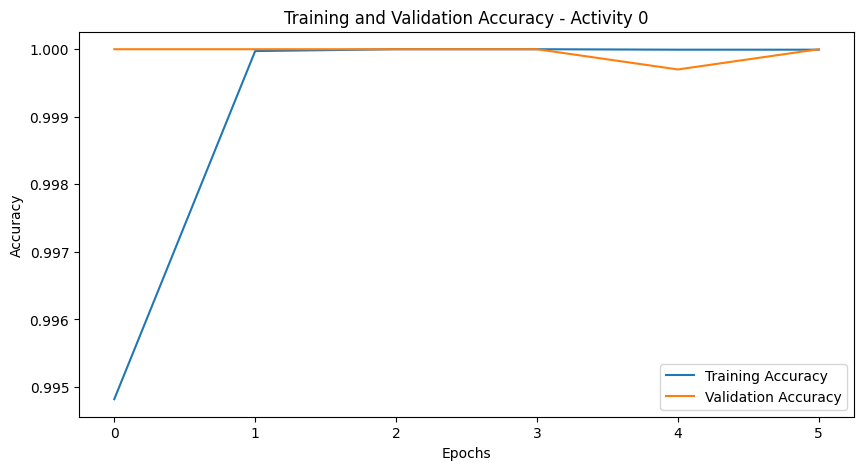

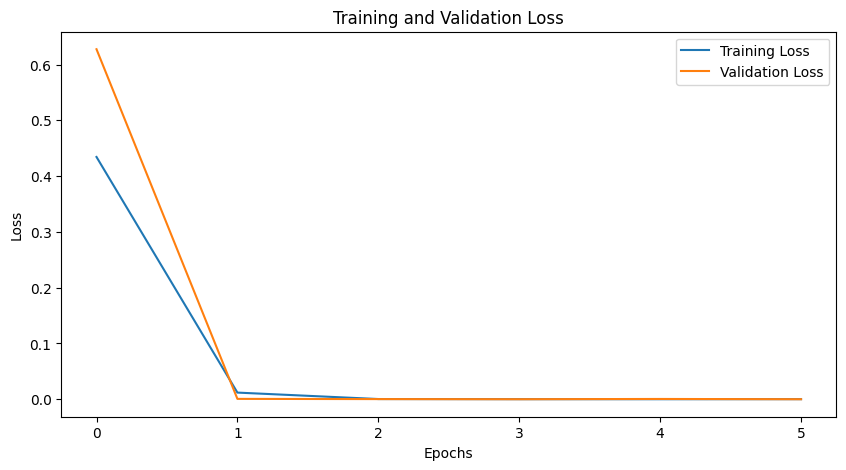

1462/1462 [==============================] - 4s 3ms/step - loss: 3.8908e-05 - accuracy: 1.0000
Epoch 1/6
4369/4369 [==============================] - 22s 4ms/step - loss: 0.5573 - accuracy: 0.7263 - val_loss: 0.0495 - val_accuracy: 0.9726
Epoch 2/6
4369/4369 [==============================] - 29s 7ms/step - loss: 0.1473 - accuracy: 0.9181 - val_loss: 0.0095 - val_accuracy: 0.9949
Epoch 3/6
4369/4369 [==============================] - 19s 4ms/step - loss: 0.0073 - accuracy: 0.9960 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 4/6
4369/4369 [==============================] - 19s 4ms/step - loss: 0.0020 - accuracy: 0.9989 - val_loss: 4.5774e-06 - val_accuracy: 1.0000
Epoch 5/6
4369/4369 [==============================] - 21s 5ms/step - loss: 3.2921e-04 - accuracy: 0.9999 - val_loss: 2.4234e-06 - val_accuracy: 1.0000
Epoch 6/6
4369/4369 [==============================] - 19s 4ms/step - loss: 8.9287e-04 - accuracy: 0.9995 - val_loss: 5.9639e-07 - val_accuracy: 1.0000


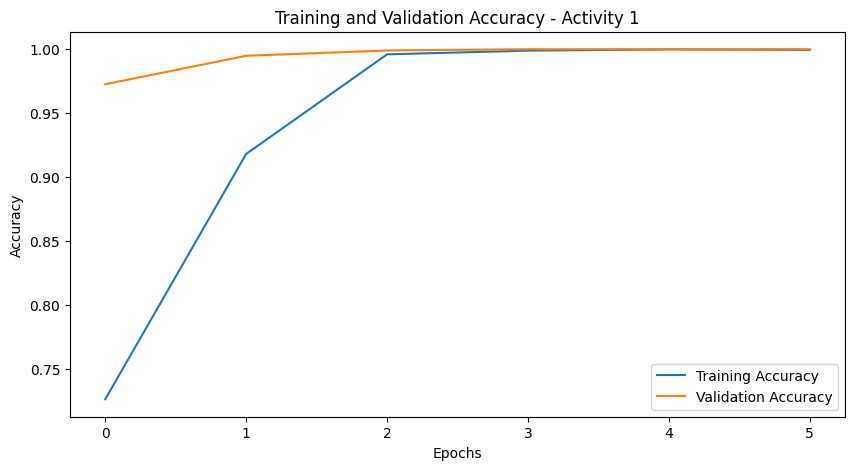

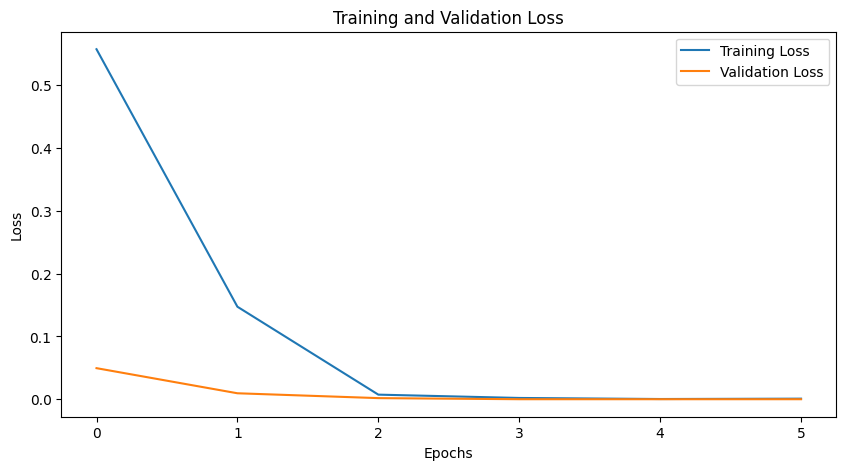

1419/1419 [==============================] - 3s 2ms/step - loss: 5.9639e-07 - accuracy: 1.0000
Epoch 1/6
4375/4375 [==============================] - 24s 5ms/step - loss: 0.1290 - accuracy: 0.9658 - val_loss: 0.0230 - val_accuracy: 0.9875
Epoch 2/6
4375/4375 [==============================] - 20s 4ms/step - loss: 0.0192 - accuracy: 0.9897 - val_loss: 0.0141 - val_accuracy: 0.9921
Epoch 3/6
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0085 - accuracy: 0.9953 - val_loss: 0.0017 - val_accuracy: 0.9990
Epoch 4/6
4375/4375 [==============================] - 22s 5ms/step - loss: 0.0026 - accuracy: 0.9985 - val_loss: 9.3364e-04 - val_accuracy: 0.9995
Epoch 5/6
4375/4375 [==============================] - 19s 4ms/step - loss: 0.0010 - accuracy: 0.9994 - val_loss: 5.9810e-07 - val_accuracy: 1.0000
Epoch 6/6
4375/4375 [==============================] - 19s 4ms/step - loss: 5.4002e-04 - accuracy: 0.9997 - val_loss: 5.9708e-07 - val_accuracy: 1.0000


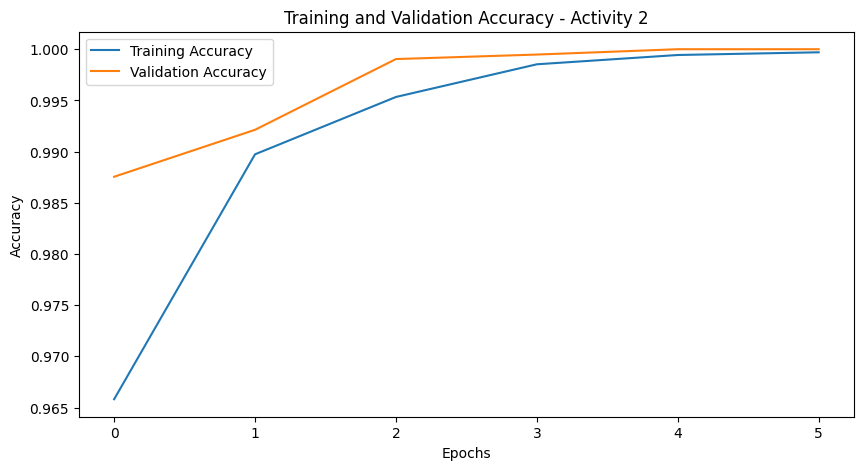

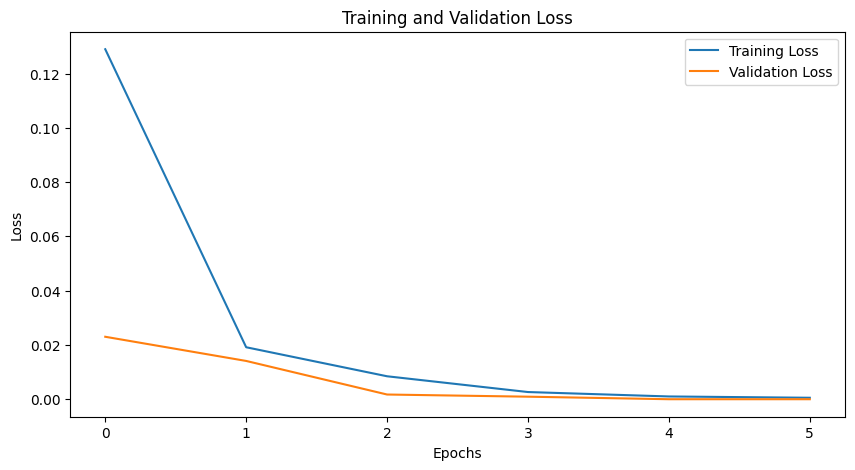

1561/1561 [==============================] - 3s 2ms/step - loss: 5.9708e-07 - accuracy: 1.0000
Epoch 1/6
5378/5378 [==============================] - 27s 4ms/step - loss: 0.1407 - accuracy: 0.9477 - val_loss: 0.0050 - val_accuracy: 0.9972
Epoch 2/6
5378/5378 [==============================] - 25s 5ms/step - loss: 0.0138 - accuracy: 0.9925 - val_loss: 3.7712e-04 - val_accuracy: 0.9998
Epoch 3/6
5378/5378 [==============================] - 26s 5ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 4.8277e-07 - val_accuracy: 1.0000
Epoch 4/6
5378/5378 [==============================] - 27s 5ms/step - loss: 4.5054e-04 - accuracy: 0.9998 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 5/6
5378/5378 [==============================] - 25s 5ms/step - loss: 3.5472e-04 - accuracy: 0.9999 - val_loss: 2.7371e-05 - val_accuracy: 1.0000
Epoch 6/6
5378/5378 [==============================] - 24s 4ms/step - loss: 4.2714e-05 - accuracy: 1.0000 - val_loss: 2.7371e-05 - val_accuracy: 1.0000


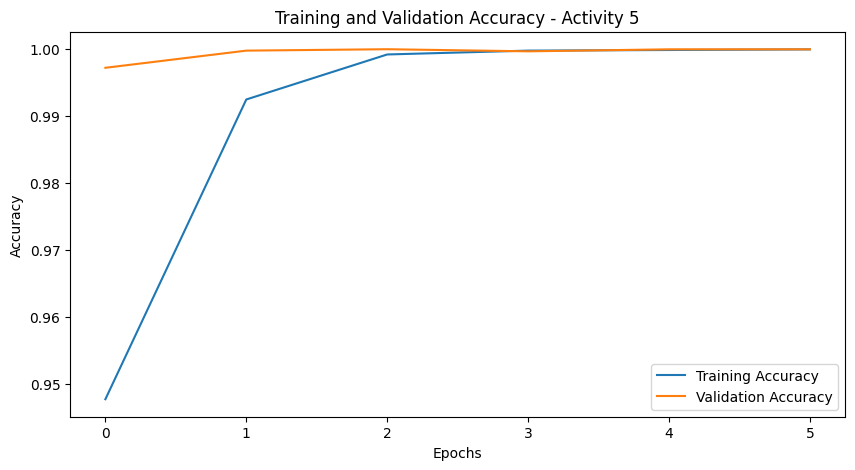

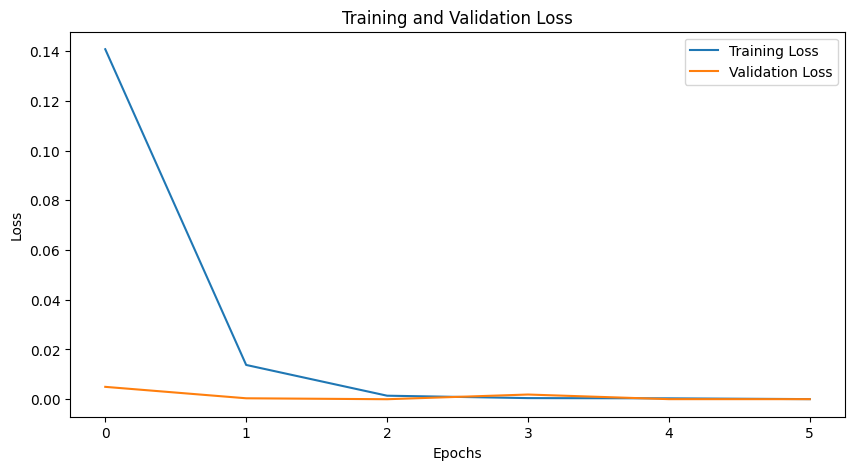

2082/2082 [==============================] - 4s 2ms/step - loss: 2.7371e-05 - accuracy: 1.0000
Epoch 1/6
4175/4175 [==============================] - 25s 5ms/step - loss: 0.1617 - accuracy: 0.9629 - val_loss: 0.0043 - val_accuracy: 0.9976
Epoch 2/6
4175/4175 [==============================] - 19s 5ms/step - loss: 0.0112 - accuracy: 0.9939 - val_loss: 2.6188e-04 - val_accuracy: 0.9999
Epoch 3/6
4175/4175 [==============================] - 18s 4ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 1.7204e-05 - val_accuracy: 1.0000
Epoch 4/6
4175/4175 [==============================] - 19s 5ms/step - loss: 2.7565e-04 - accuracy: 0.9999 - val_loss: 5.3361e-05 - val_accuracy: 1.0000
Epoch 5/6
4175/4175 [==============================] - 21s 5ms/step - loss: 1.0215e-04 - accuracy: 0.9999 - val_loss: 4.9480e-07 - val_accuracy: 1.0000
Epoch 6/6
4175/4175 [==============================] - 22s 5ms/step - loss: 3.1343e-05 - accuracy: 1.0000 - val_loss: 4.7717e-07 - val_accuracy: 1.0000


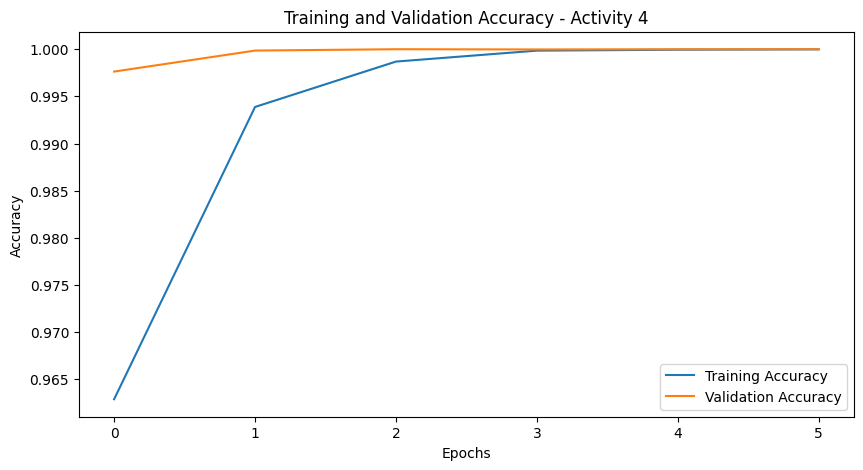

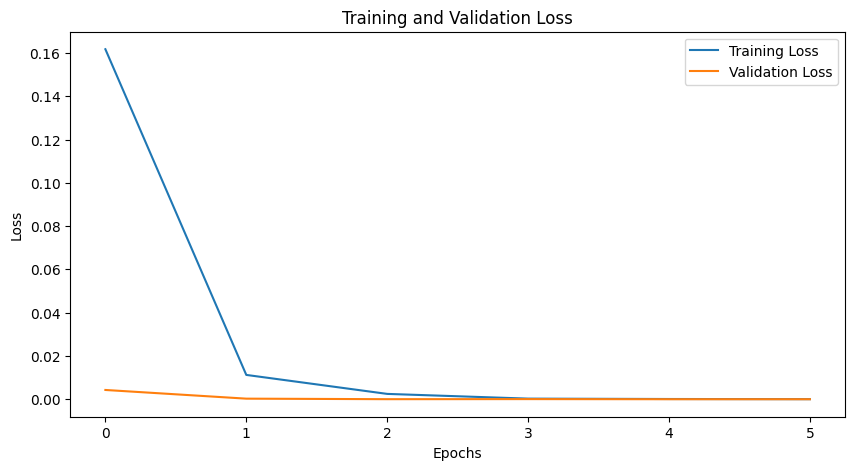

1306/1306 [==============================] - 3s 2ms/step - loss: 4.7717e-07 - accuracy: 1.0000
Epoch 1/6
5641/5641 [==============================] - 31s 5ms/step - loss: 0.1738 - accuracy: 0.9426 - val_loss: 0.0130 - val_accuracy: 0.9928
Epoch 2/6
5641/5641 [==============================] - 27s 5ms/step - loss: 0.0061 - accuracy: 0.9967 - val_loss: 0.0019 - val_accuracy: 0.9989
Epoch 3/6
5641/5641 [==============================] - 27s 5ms/step - loss: 4.2344e-04 - accuracy: 0.9998 - val_loss: 5.4243e-04 - val_accuracy: 0.9998
Epoch 4/6
5641/5641 [==============================] - 31s 6ms/step - loss: 9.4414e-05 - accuracy: 1.0000 - val_loss: 1.8515e-04 - val_accuracy: 0.9999
Epoch 5/6
5641/5641 [==============================] - 37s 7ms/step - loss: 4.3117e-05 - accuracy: 1.0000 - val_loss: 5.9691e-07 - val_accuracy: 1.0000
Epoch 6/6
5641/5641 [==============================] - 28s 5ms/step - loss: 1.3318e-05 - accuracy: 1.0000 - val_loss: 6.2225e-05 - val_accuracy: 1.0000


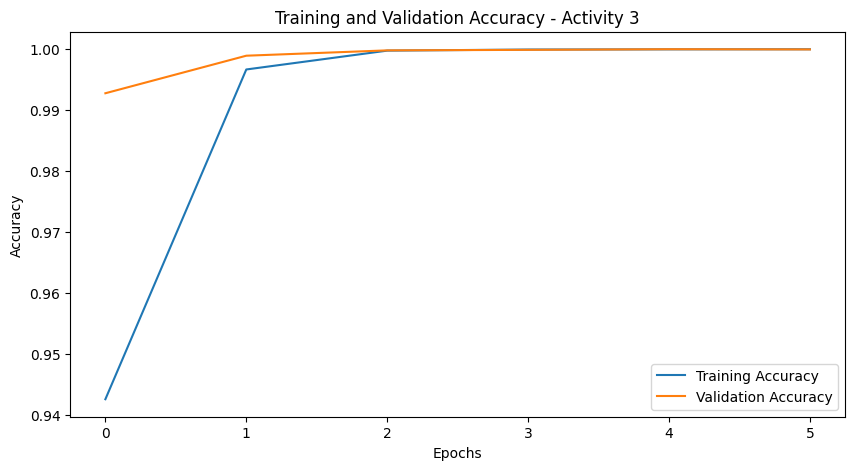

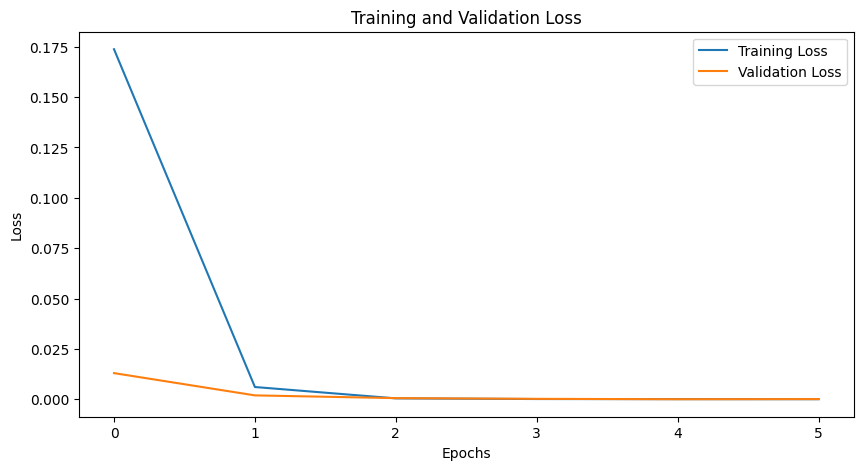

1821/1821 [==============================] - 4s 2ms/step - loss: 6.2225e-05 - accuracy: 1.0000
No data leakage detected.
Epoch 1/6
4412/4412 [==============================] - 27s 5ms/step - loss: 0.3115 - accuracy: 0.9945 - val_loss: 0.1519 - val_accuracy: 0.9995
Epoch 2/6
4412/4412 [==============================] - 21s 5ms/step - loss: 5.4699e-04 - accuracy: 1.0000 - val_loss: 0.1640 - val_accuracy: 0.9997
Epoch 3/6
4412/4412 [==============================] - 22s 5ms/step - loss: 1.1223e-04 - accuracy: 1.0000 - val_loss: 4.3381e-04 - val_accuracy: 1.0000
Epoch 4/6
4412/4412 [==============================] - 24s 5ms/step - loss: 1.9667e-04 - accuracy: 1.0000 - val_loss: 6.9190 - val_accuracy: 0.5610
Epoch 5/6
4412/4412 [==============================] - 21s 5ms/step - loss: 1.6277e-05 - accuracy: 1.0000 - val_loss: 7.0117 - val_accuracy: 0.5614
Epoch 6/6
4412/4412 [==============================] - 21s 5ms/step - loss: 1.0347e-04 - accuracy: 1.0000 - val_loss: 5.8854 - val_accuracy

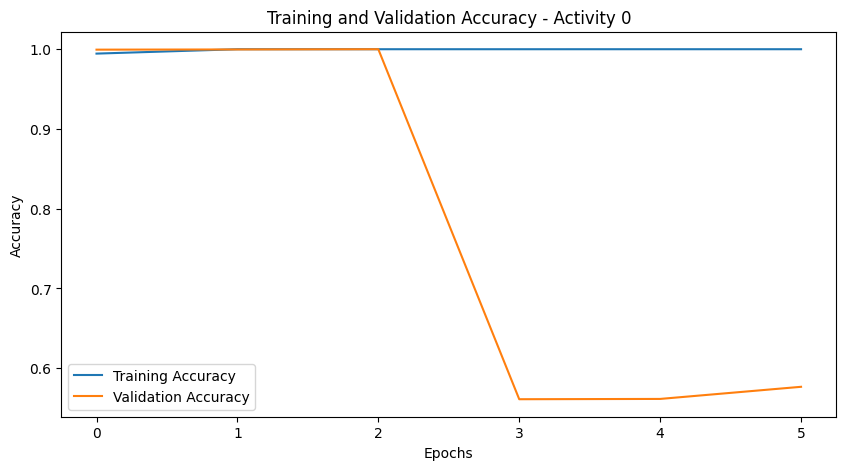

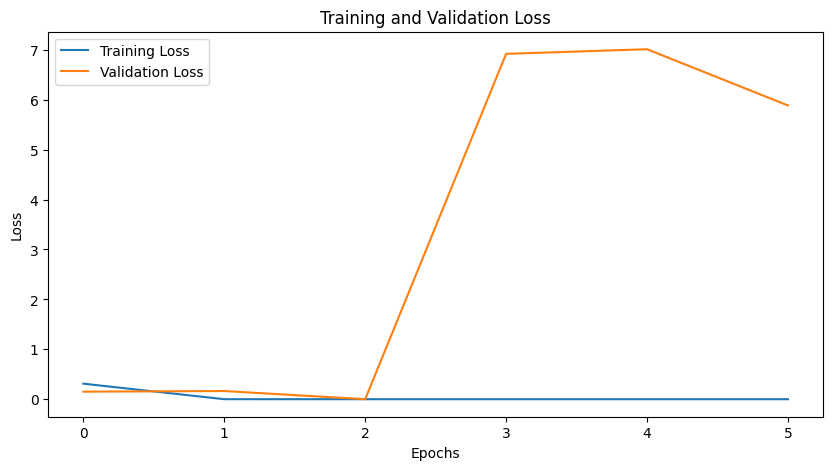

1605/1605 [==============================] - 4s 2ms/step - loss: 5.8854 - accuracy: 0.5766
Epoch 1/6
4338/4338 [==============================] - 23s 5ms/step - loss: 0.1512 - accuracy: 0.9563 - val_loss: 0.0218 - val_accuracy: 0.9899
Epoch 2/6
4338/4338 [==============================] - 20s 5ms/step - loss: 0.0156 - accuracy: 0.9917 - val_loss: 0.0138 - val_accuracy: 0.9923
Epoch 3/6
4338/4338 [==============================] - 23s 5ms/step - loss: 0.0053 - accuracy: 0.9970 - val_loss: 4.8778e-06 - val_accuracy: 1.0000
Epoch 4/6
4338/4338 [==============================] - 20s 5ms/step - loss: 2.2612e-04 - accuracy: 0.9999 - val_loss: 5.9652e-07 - val_accuracy: 1.0000
Epoch 5/6
4338/4338 [==============================] - 21s 5ms/step - loss: 2.3901e-04 - accuracy: 0.9999 - val_loss: 5.9650e-07 - val_accuracy: 1.0000
Epoch 6/6
4338/4338 [==============================] - 21s 5ms/step - loss: 1.2832e-04 - accuracy: 1.0000 - val_loss: 5.9732e-07 - val_accuracy: 1.0000


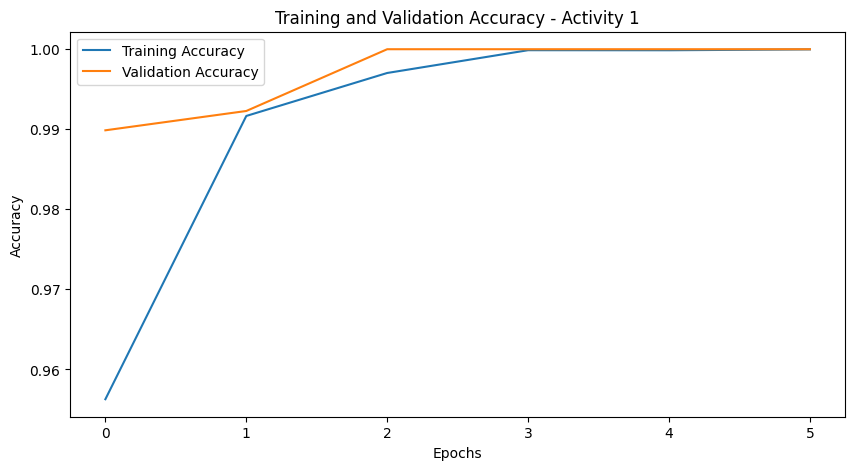

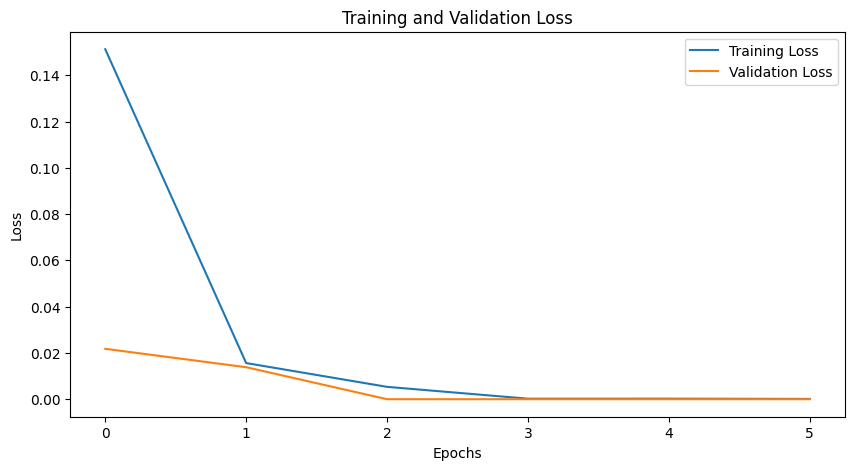

1451/1451 [==============================] - 3s 2ms/step - loss: 5.9732e-07 - accuracy: 1.0000
Epoch 1/6
4471/4471 [==============================] - 23s 5ms/step - loss: 0.2705 - accuracy: 0.9071 - val_loss: 0.1836 - val_accuracy: 0.9656
Epoch 2/6
4471/4471 [==============================] - 25s 5ms/step - loss: 0.0122 - accuracy: 0.9936 - val_loss: 0.0802 - val_accuracy: 0.9951
Epoch 3/6
4471/4471 [==============================] - 21s 5ms/step - loss: 0.0049 - accuracy: 0.9973 - val_loss: 4.1720e-04 - val_accuracy: 1.0000
Epoch 4/6
4471/4471 [==============================] - 21s 5ms/step - loss: 1.7160e-04 - accuracy: 1.0000 - val_loss: 4.7558e-05 - val_accuracy: 1.0000
Epoch 5/6
4471/4471 [==============================] - 22s 5ms/step - loss: 9.8310e-05 - accuracy: 1.0000 - val_loss: 7.1002e-04 - val_accuracy: 0.9999
Epoch 6/6
4471/4471 [==============================] - 24s 5ms/step - loss: 4.2935e-04 - accuracy: 0.9998 - val_loss: 4.3251e-05 - val_accuracy: 1.0000


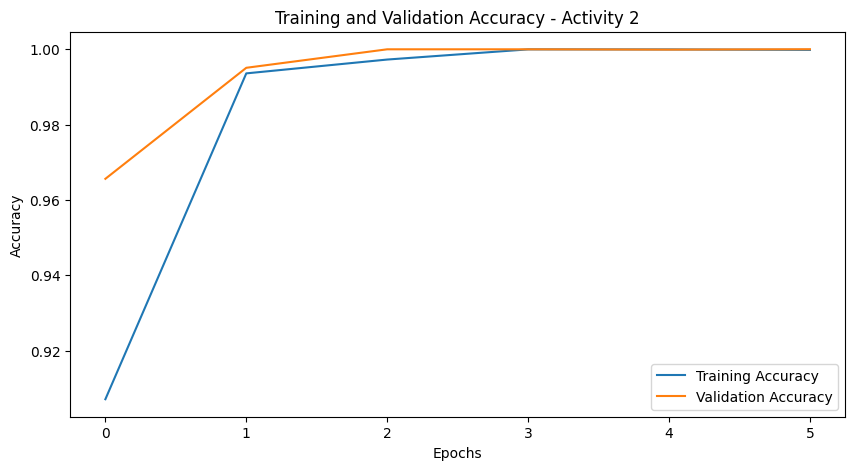

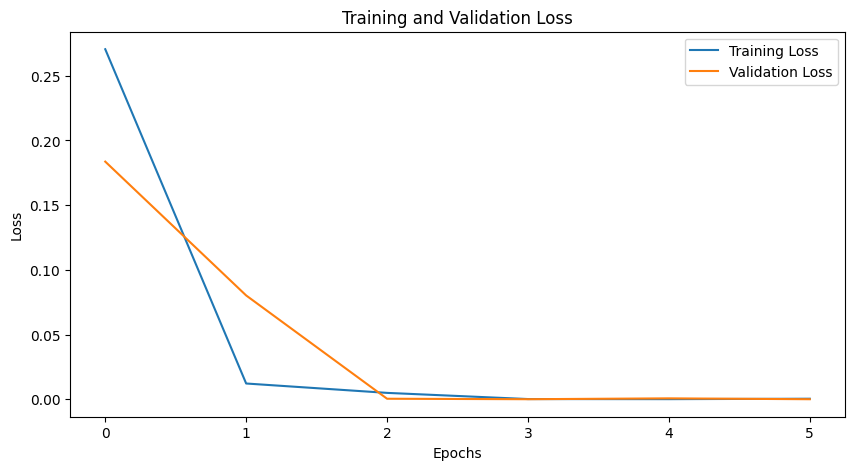

1465/1465 [==============================] - 3s 2ms/step - loss: 4.3251e-05 - accuracy: 1.0000
Epoch 1/6
5692/5692 [==============================] - 33s 5ms/step - loss: 0.2062 - accuracy: 0.9238 - val_loss: 0.0539 - val_accuracy: 0.9699
Epoch 2/6
5692/5692 [==============================] - 28s 5ms/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 1.1783e-04 - val_accuracy: 1.0000
Epoch 3/6
5692/5692 [==============================] - 26s 4ms/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 4.7852e-07 - val_accuracy: 1.0000
Epoch 4/6
5692/5692 [==============================] - 30s 5ms/step - loss: 0.0073 - accuracy: 0.9960 - val_loss: 4.7709e-07 - val_accuracy: 1.0000
Epoch 5/6
5692/5692 [==============================] - 26s 5ms/step - loss: 4.6737e-05 - accuracy: 1.0000 - val_loss: 4.7718e-07 - val_accuracy: 1.0000
Epoch 6/6
5692/5692 [==============================] - 27s 5ms/step - loss: 8.8213e-05 - accuracy: 1.0000 - val_loss: 9.7797e-05 - val_accuracy: 1.0000


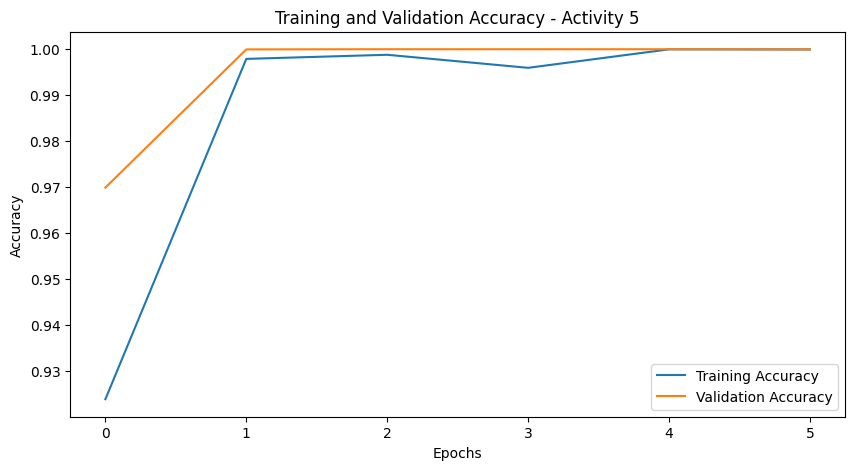

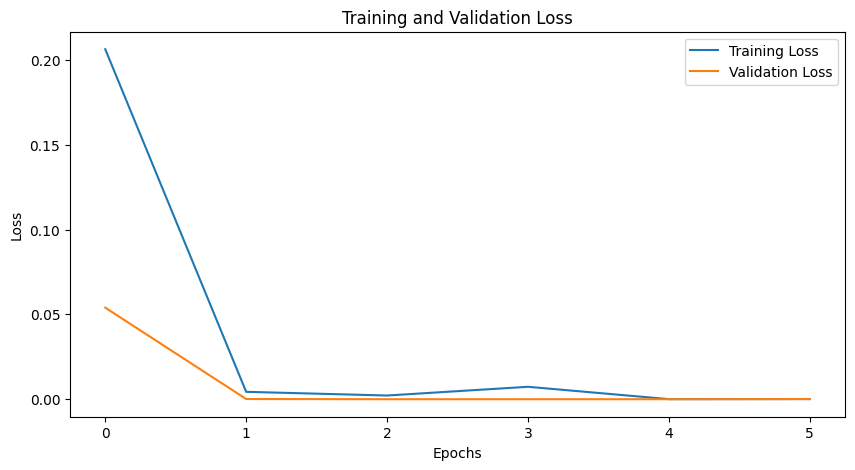

1768/1768 [==============================] - 4s 2ms/step - loss: 9.7797e-05 - accuracy: 1.0000
Epoch 1/6
4004/4004 [==============================] - 25s 6ms/step - loss: 0.3726 - accuracy: 0.8992 - val_loss: 0.0964 - val_accuracy: 0.9470
Epoch 2/6
4004/4004 [==============================] - 19s 5ms/step - loss: 0.1073 - accuracy: 0.9426 - val_loss: 0.1005 - val_accuracy: 0.9443
Epoch 3/6
4004/4004 [==============================] - 21s 5ms/step - loss: 0.0219 - accuracy: 0.9881 - val_loss: 0.0051 - val_accuracy: 0.9971
Epoch 4/6
4004/4004 [==============================] - 22s 5ms/step - loss: 0.0028 - accuracy: 0.9985 - val_loss: 0.0024 - val_accuracy: 0.9987
Epoch 5/6
4004/4004 [==============================] - 18s 5ms/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 0.0016 - val_accuracy: 0.9991
Epoch 6/6
4004/4004 [==============================] - 19s 5ms/step - loss: 5.0956e-04 - accuracy: 0.9997 - val_loss: 4.1271e-05 - val_accuracy: 1.0000


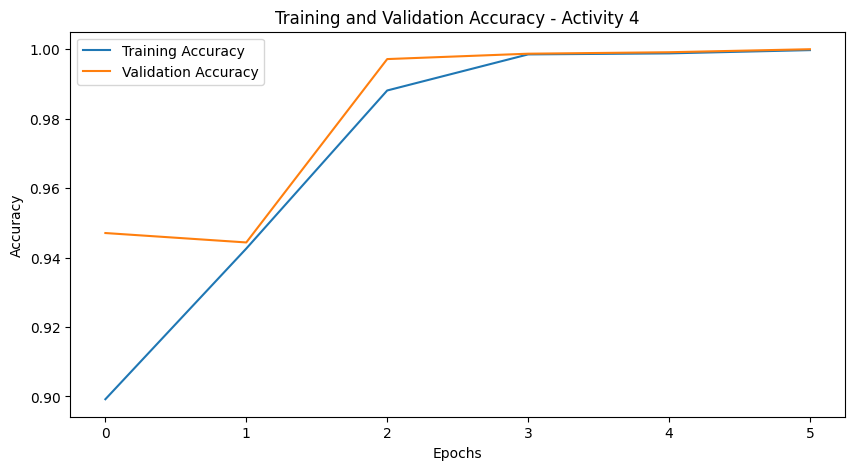

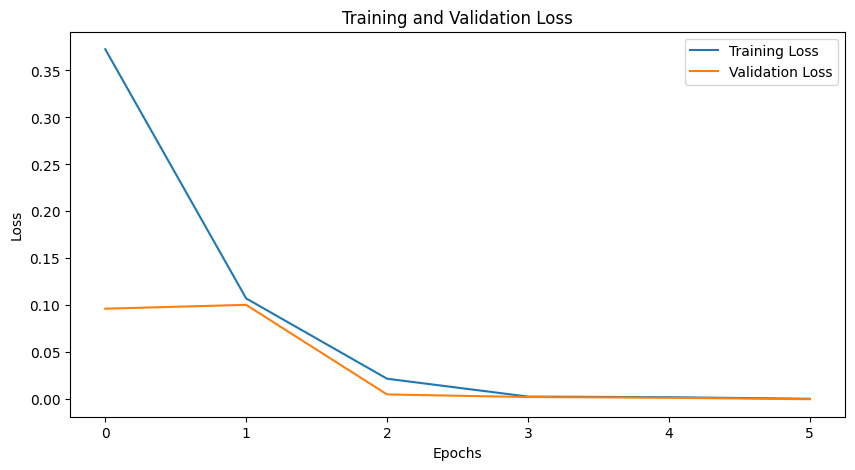

1477/1477 [==============================] - 3s 2ms/step - loss: 4.1271e-05 - accuracy: 1.0000
Epoch 1/6
5781/5781 [==============================] - 30s 5ms/step - loss: 0.3068 - accuracy: 0.8805 - val_loss: 0.0098 - val_accuracy: 0.9946
Epoch 2/6
5781/5781 [==============================] - 25s 4ms/step - loss: 0.0171 - accuracy: 0.9905 - val_loss: 0.0050 - val_accuracy: 0.9972
Epoch 3/6
5781/5781 [==============================] - 30s 5ms/step - loss: 0.0114 - accuracy: 0.9938 - val_loss: 6.7228e-05 - val_accuracy: 1.0000
Epoch 4/6
5781/5781 [==============================] - 28s 5ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 5.9941e-07 - val_accuracy: 1.0000
Epoch 5/6
5781/5781 [==============================] - 26s 4ms/step - loss: 5.5375e-04 - accuracy: 0.9997 - val_loss: 0.0291 - val_accuracy: 0.9838
Epoch 6/6
5781/5781 [==============================] - 29s 5ms/step - loss: 2.9657e-05 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9895


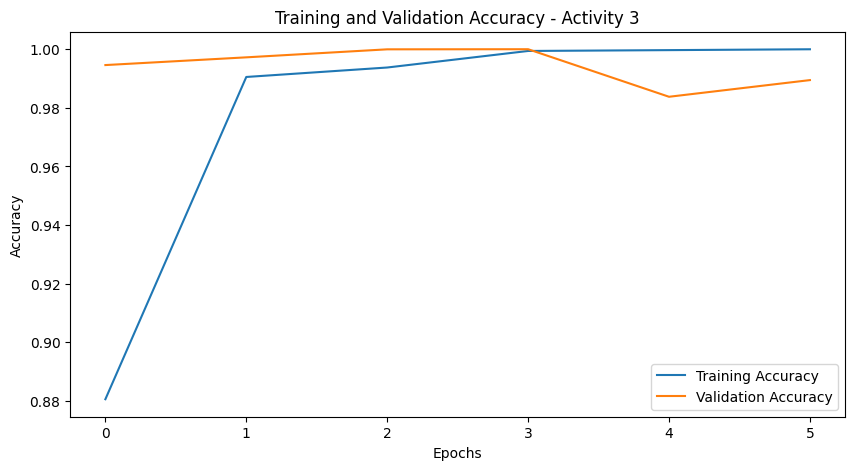

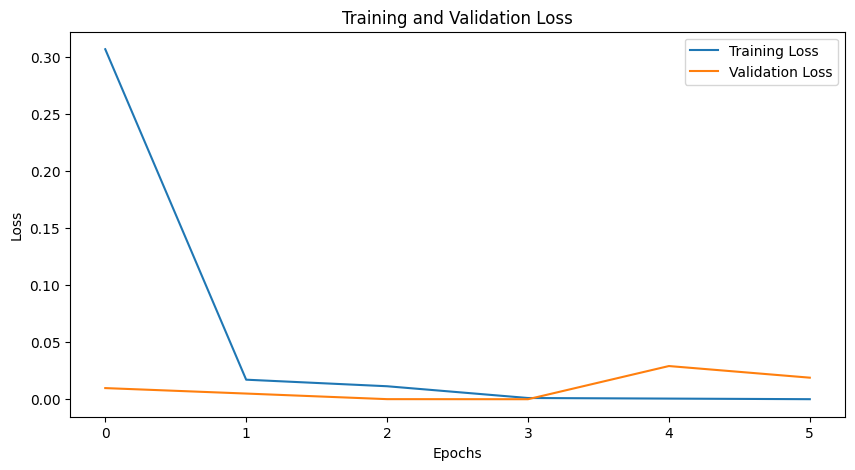

1681/1681 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9895
No data leakage detected.
Epoch 1/6
4587/4587 [==============================] - 25s 5ms/step - loss: 0.1636 - accuracy: 0.9950 - val_loss: 6.0896e-07 - val_accuracy: 1.0000
Epoch 2/6
4587/4587 [==============================] - 22s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4317e-06 - val_accuracy: 1.0000
Epoch 3/6
4587/4587 [==============================] - 26s 6ms/step - loss: 1.2346e-04 - accuracy: 1.0000 - val_loss: 5.9744e-07 - val_accuracy: 1.0000
Epoch 4/6
4587/4587 [==============================] - 22s 5ms/step - loss: 5.9109e-05 - accuracy: 1.0000 - val_loss: 6.0672e-07 - val_accuracy: 1.0000
Epoch 5/6
4587/4587 [==============================] - 22s 5ms/step - loss: 6.5606e-05 - accuracy: 1.0000 - val_loss: 5.9692e-07 - val_accuracy: 1.0000
Epoch 6/6
4587/4587 [==============================] - 25s 5ms/step - loss: 1.3941e-05 - accuracy: 1.0000 - val_loss: 5.9605e-07 - 

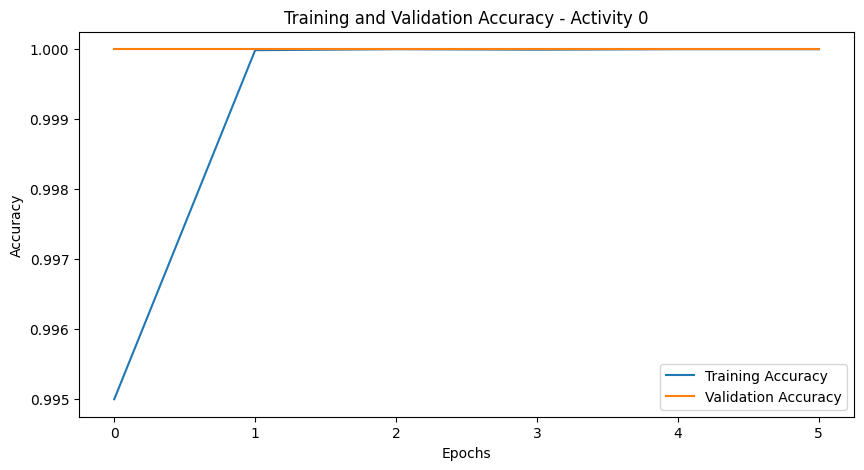

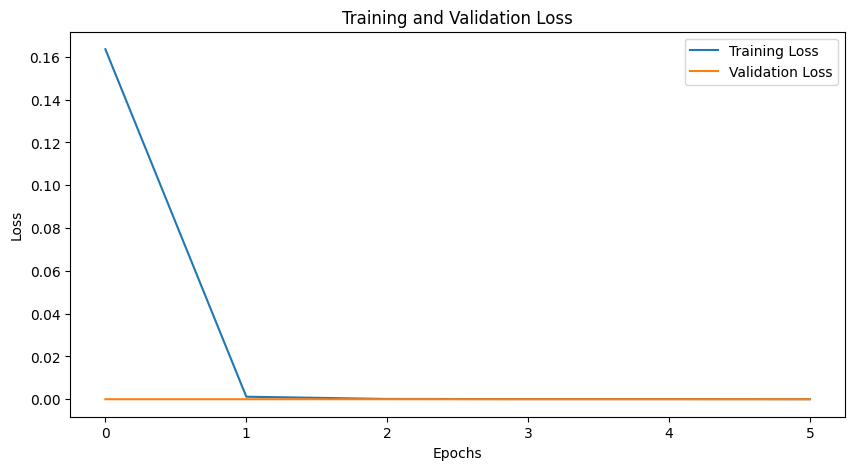

1430/1430 [==============================] - 3s 2ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
4049/4049 [==============================] - 25s 6ms/step - loss: 0.2008 - accuracy: 0.9213 - val_loss: 8.7229e-06 - val_accuracy: 1.0000
Epoch 2/6
4049/4049 [==============================] - 22s 6ms/step - loss: 0.0072 - accuracy: 0.9961 - val_loss: 7.5965e-07 - val_accuracy: 1.0000
Epoch 3/6
4049/4049 [==============================] - 20s 5ms/step - loss: 4.6601e-04 - accuracy: 0.9997 - val_loss: 6.7306e-07 - val_accuracy: 1.0000
Epoch 4/6
4049/4049 [==============================] - 23s 6ms/step - loss: 2.3965e-04 - accuracy: 0.9999 - val_loss: 4.5493e-05 - val_accuracy: 1.0000
Epoch 5/6
4049/4049 [==============================] - 20s 5ms/step - loss: 3.6682e-04 - accuracy: 0.9999 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 6/6
4049/4049 [==============================] - 23s 6ms/step - loss: 2.6455e-04 - accuracy: 0.9999 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


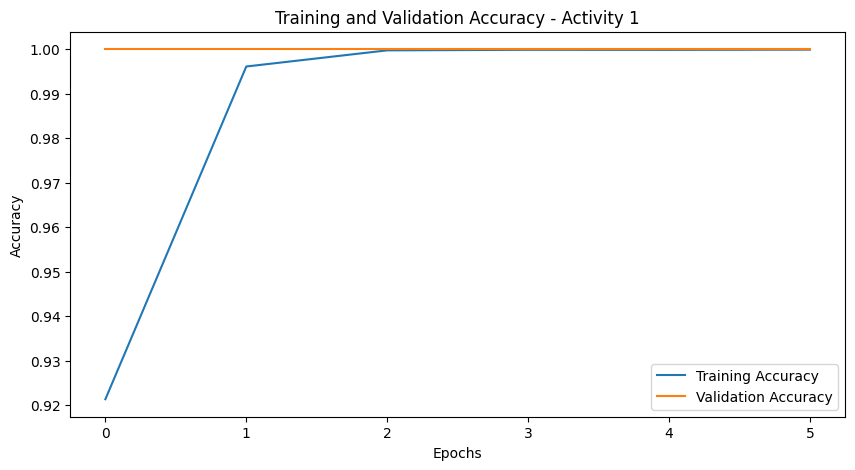

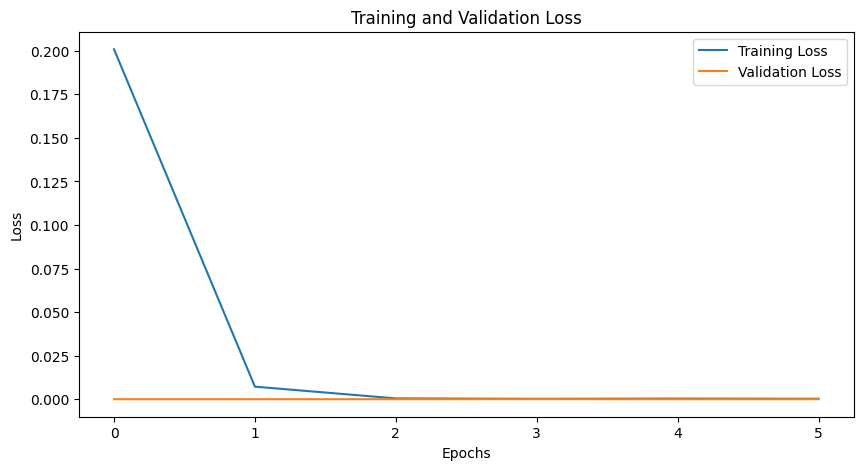

1739/1739 [==============================] - 5s 3ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
4603/4603 [==============================] - 25s 5ms/step - loss: 0.1512 - accuracy: 0.9705 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 2/6
4603/4603 [==============================] - 22s 5ms/step - loss: 0.0036 - accuracy: 0.9981 - val_loss: 0.0123 - val_accuracy: 0.9963
Epoch 3/6
4603/4603 [==============================] - 22s 5ms/step - loss: 0.0021 - accuracy: 0.9989 - val_loss: 0.0118 - val_accuracy: 0.9948
Epoch 4/6
4603/4603 [==============================] - 25s 5ms/step - loss: 0.0026 - accuracy: 0.9986 - val_loss: 0.0079 - val_accuracy: 0.9970
Epoch 5/6
4603/4603 [==============================] - 23s 5ms/step - loss: 3.2195e-04 - accuracy: 0.9998 - val_loss: 3.9397e-04 - val_accuracy: 0.9999
Epoch 6/6
4603/4603 [==============================] - 23s 5ms/step - loss: 4.6552e-04 - accuracy: 0.9998 - val_loss: 6.0116e-07 - val_accuracy: 1.0000


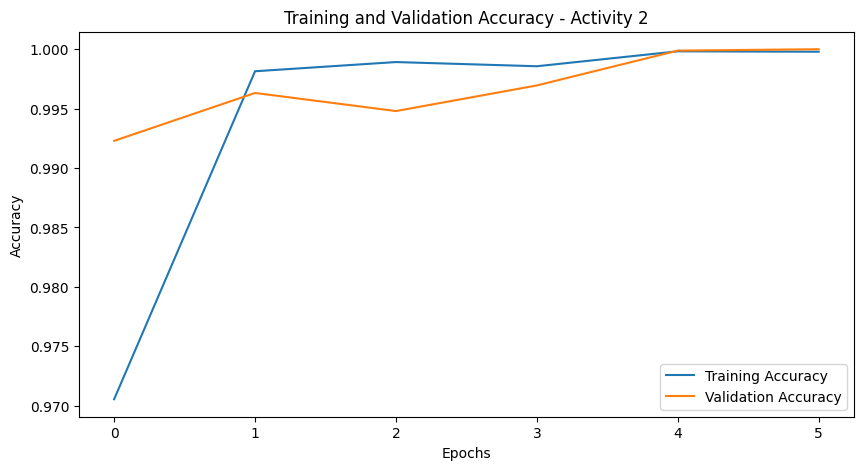

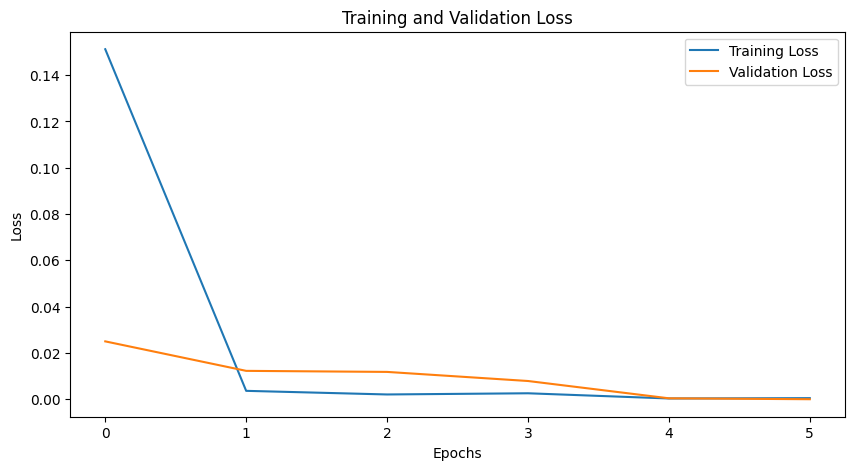

1334/1334 [==============================] - 3s 2ms/step - loss: 6.0116e-07 - accuracy: 1.0000
Epoch 1/6
5553/5553 [==============================] - 32s 5ms/step - loss: 0.3319 - accuracy: 0.8405 - val_loss: 0.0344 - val_accuracy: 0.9808
Epoch 2/6
5553/5553 [==============================] - 28s 5ms/step - loss: 0.0359 - accuracy: 0.9801 - val_loss: 0.0020 - val_accuracy: 0.9989
Epoch 3/6
5553/5553 [==============================] - 26s 5ms/step - loss: 0.0162 - accuracy: 0.9910 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 4/6
5553/5553 [==============================] - 29s 5ms/step - loss: 0.0040 - accuracy: 0.9978 - val_loss: 0.0025 - val_accuracy: 0.9986
Epoch 5/6
5553/5553 [==============================] - 29s 5ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 2.9853e-05 - val_accuracy: 1.0000
Epoch 6/6
5553/5553 [==============================] - 29s 5ms/step - loss: 1.2397e-04 - accuracy: 0.9999 - val_loss: 8.6712e-06 - val_accuracy: 1.0000


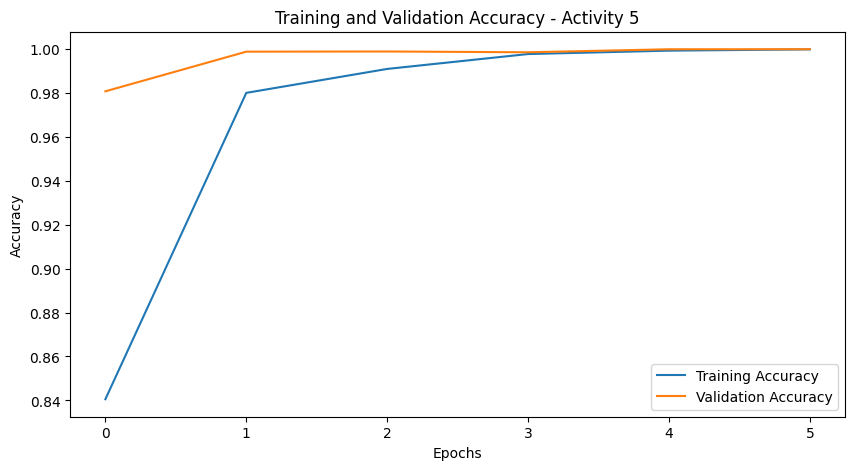

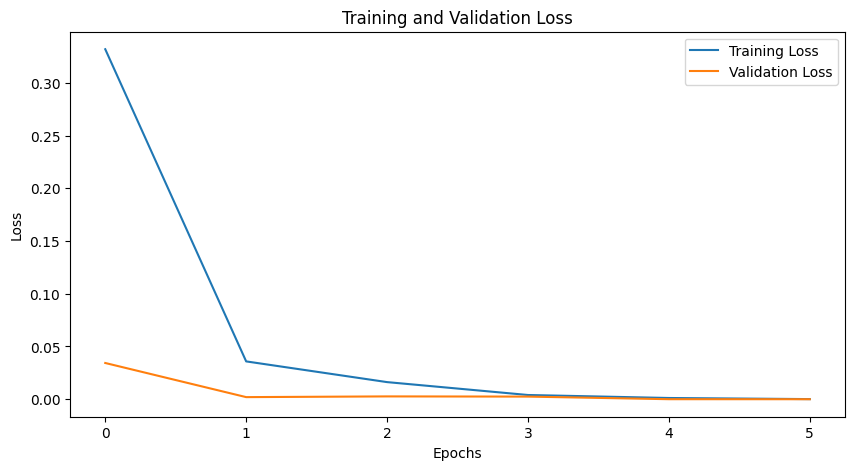

1907/1907 [==============================] - 4s 2ms/step - loss: 8.6712e-06 - accuracy: 1.0000
Epoch 1/6
4081/4081 [==============================] - 24s 5ms/step - loss: 0.2679 - accuracy: 0.9247 - val_loss: 0.0209 - val_accuracy: 0.9884
Epoch 2/6
4081/4081 [==============================] - 21s 5ms/step - loss: 0.0589 - accuracy: 0.9677 - val_loss: 0.0231 - val_accuracy: 0.9871
Epoch 3/6
4081/4081 [==============================] - 21s 5ms/step - loss: 0.0202 - accuracy: 0.9889 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 4/6
4081/4081 [==============================] - 20s 5ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 9.2106e-04 - val_accuracy: 0.9995
Epoch 5/6
4081/4081 [==============================] - 20s 5ms/step - loss: 6.0929e-04 - accuracy: 0.9997 - val_loss: 8.0547e-05 - val_accuracy: 1.0000
Epoch 6/6
4081/4081 [==============================] - 20s 5ms/step - loss: 1.8240e-04 - accuracy: 0.9999 - val_loss: 4.8384e-07 - val_accuracy: 1.0000


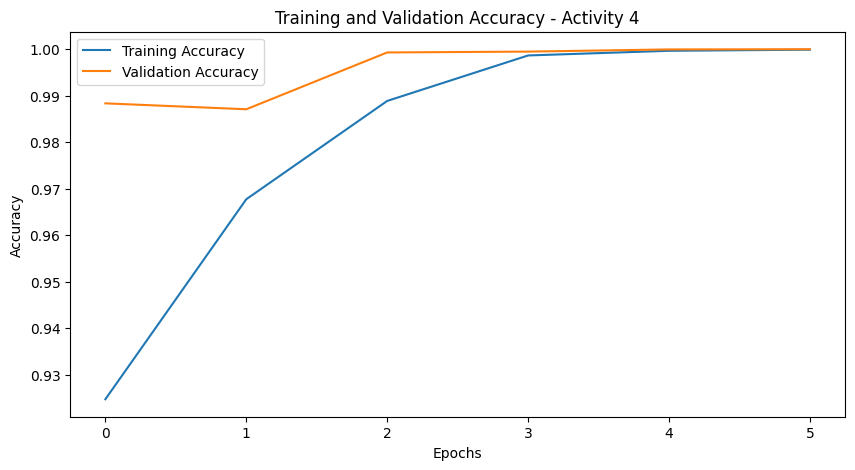

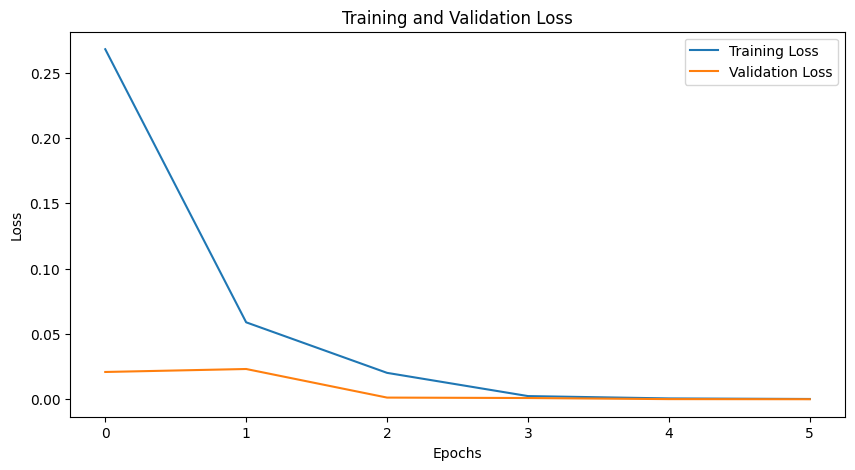

1400/1400 [==============================] - 3s 2ms/step - loss: 4.8384e-07 - accuracy: 1.0000
Epoch 1/6
5553/5553 [==============================] - 35s 5ms/step - loss: 0.7107 - accuracy: 0.7358 - val_loss: 0.2737 - val_accuracy: 0.8485
Epoch 2/6
5553/5553 [==============================] - 31s 6ms/step - loss: 0.3633 - accuracy: 0.7984 - val_loss: 0.2379 - val_accuracy: 0.8675
Epoch 3/6
5553/5553 [==============================] - 29s 5ms/step - loss: 0.1718 - accuracy: 0.9043 - val_loss: 0.0028 - val_accuracy: 0.9984
Epoch 4/6
5553/5553 [==============================] - 31s 6ms/step - loss: 0.0117 - accuracy: 0.9935 - val_loss: 2.9940e-05 - val_accuracy: 1.0000
Epoch 5/6
5553/5553 [==============================] - 31s 6ms/step - loss: 0.0054 - accuracy: 0.9970 - val_loss: 6.0398e-07 - val_accuracy: 1.0000
Epoch 6/6
5553/5553 [==============================] - 32s 6ms/step - loss: 4.4550e-04 - accuracy: 0.9998 - val_loss: 5.9619e-07 - val_accuracy: 1.0000


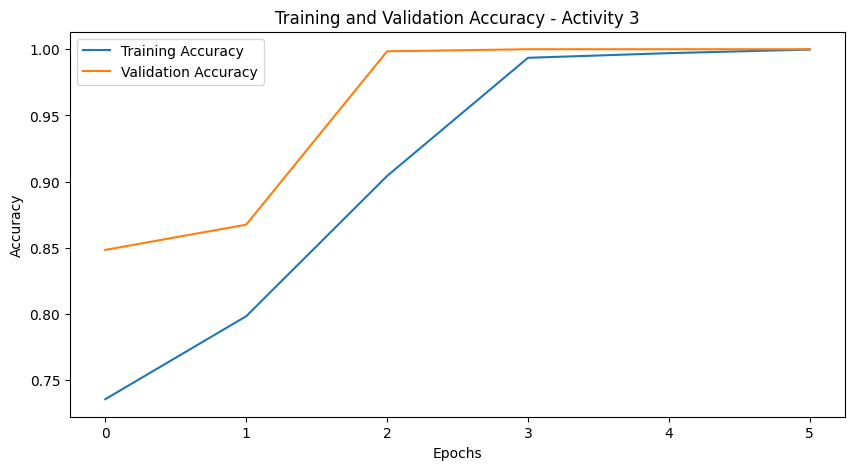

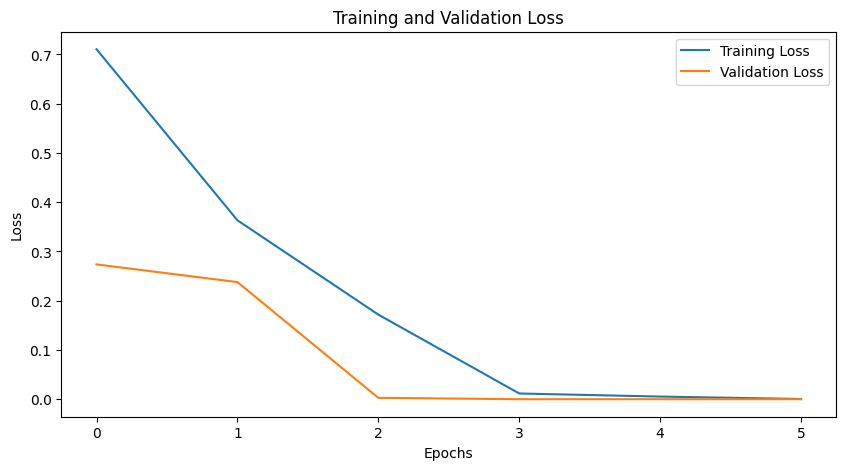

1909/1909 [==============================] - 5s 2ms/step - loss: 5.9619e-07 - accuracy: 1.0000
No data leakage detected.
Epoch 1/6
5297/5297 [==============================] - 32s 6ms/step - loss: 0.3707 - accuracy: 0.9952 - val_loss: 7.8354e-05 - val_accuracy: 1.0000
Epoch 2/6
5297/5297 [==============================] - 26s 5ms/step - loss: 0.2395 - accuracy: 1.0000 - val_loss: 5.9946e-07 - val_accuracy: 1.0000
Epoch 3/6
5297/5297 [==============================] - 29s 5ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 5.9612e-07 - val_accuracy: 1.0000
Epoch 4/6
5297/5297 [==============================] - 27s 5ms/step - loss: 1.2814e-05 - accuracy: 1.0000 - val_loss: 5.9610e-07 - val_accuracy: 1.0000
Epoch 5/6
5297/5297 [==============================] - 28s 5ms/step - loss: 1.8909e-06 - accuracy: 1.0000 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 6/6
5297/5297 [==============================] - 27s 5ms/step - loss: 8.6308e-05 - accuracy: 1.0000 - val_loss: 5.9605e-07 - 

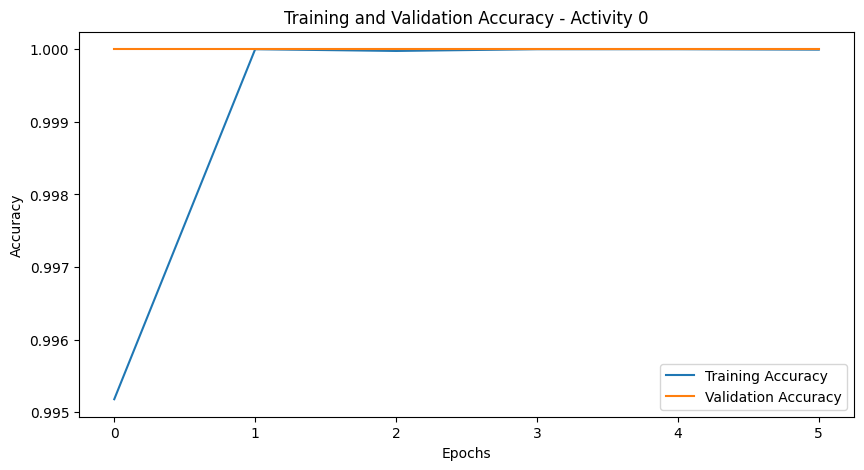

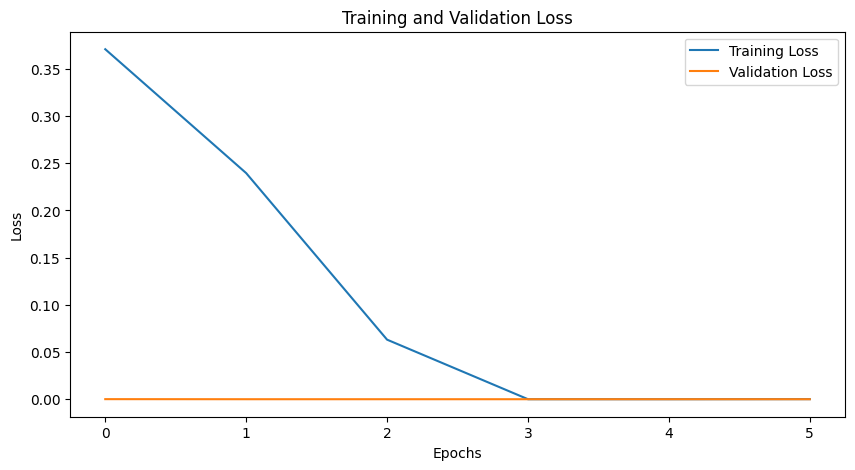

721/721 [==============================] - 2s 2ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
4991/4991 [==============================] - 30s 6ms/step - loss: 0.1741 - accuracy: 0.9278 - val_loss: 6.0276e-07 - val_accuracy: 1.0000
Epoch 2/6
4991/4991 [==============================] - 25s 5ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 5.9623e-07 - val_accuracy: 1.0000
Epoch 3/6
4991/4991 [==============================] - 25s 5ms/step - loss: 4.6972e-04 - accuracy: 0.9998 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 4/6
4991/4991 [==============================] - 27s 5ms/step - loss: 6.4535e-04 - accuracy: 0.9998 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 5/6
4991/4991 [==============================] - 26s 5ms/step - loss: 3.9649e-04 - accuracy: 0.9998 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 6/6
4991/4991 [==============================] - 25s 5ms/step - loss: 1.2619e-05 - accuracy: 1.0000 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


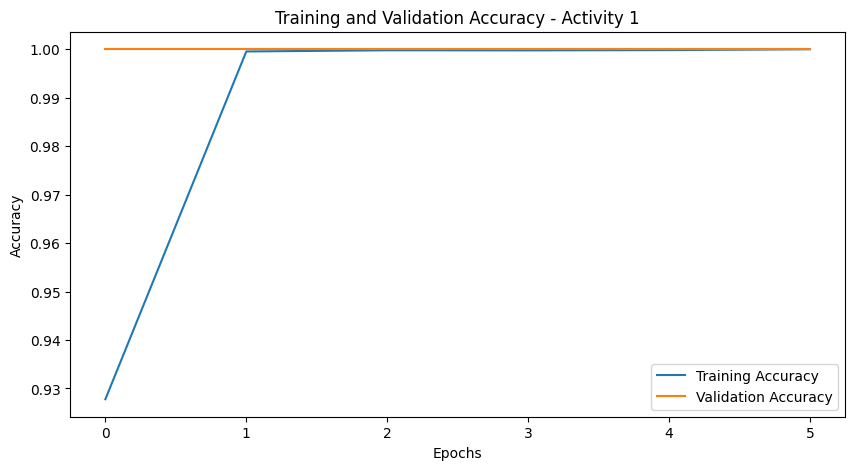

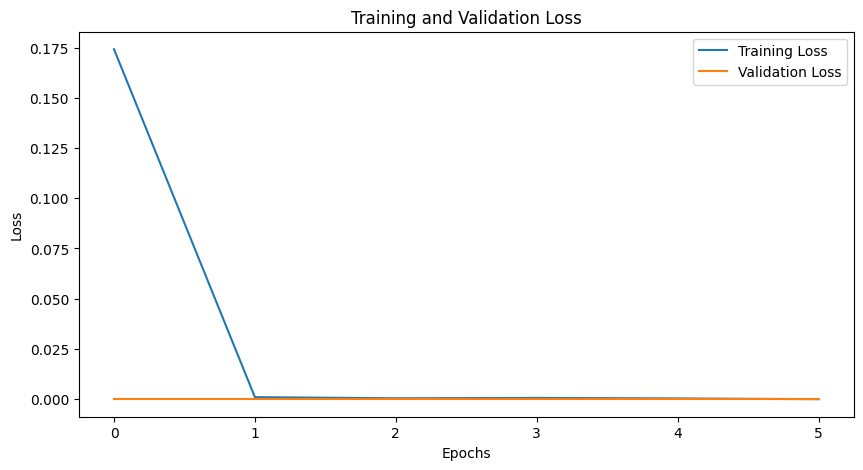

797/797 [==============================] - 2s 2ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
5164/5164 [==============================] - 30s 5ms/step - loss: 0.2958 - accuracy: 0.8999 - val_loss: 8.8070e-04 - val_accuracy: 0.9996
Epoch 2/6
5164/5164 [==============================] - 26s 5ms/step - loss: 0.1248 - accuracy: 0.9309 - val_loss: 2.9156e-04 - val_accuracy: 0.9998
Epoch 3/6
5164/5164 [==============================] - 26s 5ms/step - loss: 0.0814 - accuracy: 0.9547 - val_loss: 7.3127e-05 - val_accuracy: 1.0000
Epoch 4/6
5164/5164 [==============================] - 27s 5ms/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 6.0294e-07 - val_accuracy: 1.0000
Epoch 5/6
5164/5164 [==============================] - 31s 6ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 5.9773e-07 - val_accuracy: 1.0000
Epoch 6/6
5164/5164 [==============================] - 27s 5ms/step - loss: 4.8174e-04 - accuracy: 0.9998 - val_loss: 5.9681e-07 - val_accuracy: 1.0000


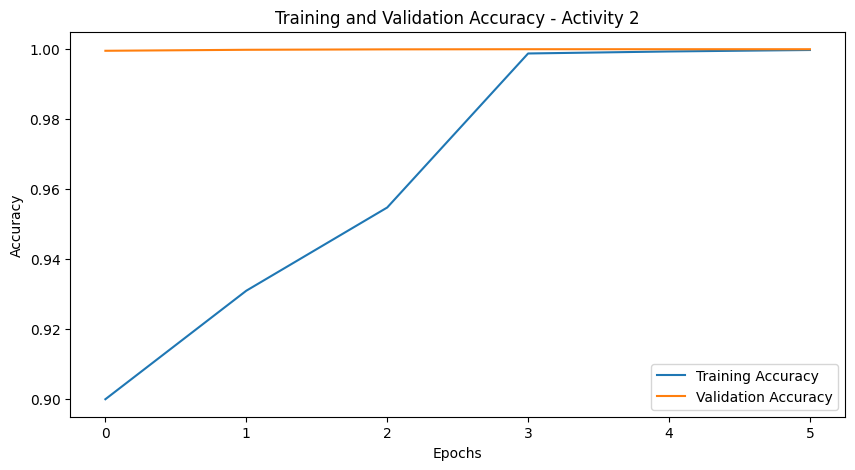

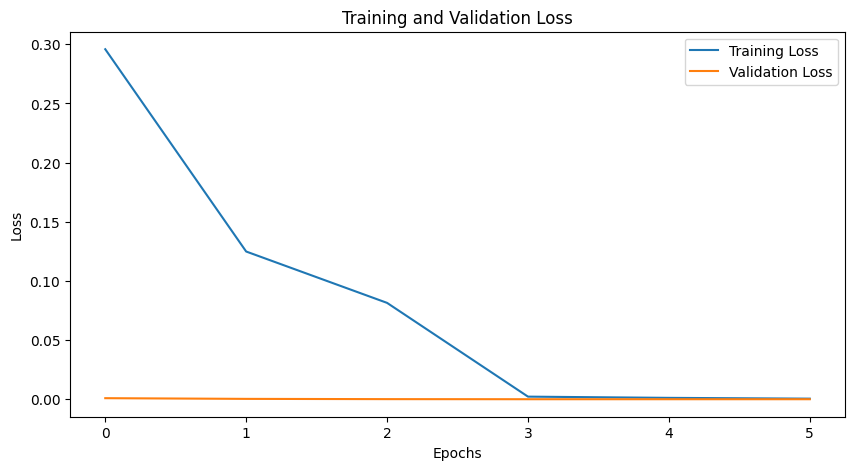

773/773 [==============================] - 2s 3ms/step - loss: 5.9681e-07 - accuracy: 1.0000
Epoch 1/6
6678/6678 [==============================] - 37s 5ms/step - loss: 0.2673 - accuracy: 0.8742 - val_loss: 0.3106 - val_accuracy: 0.8266
Epoch 2/6
6678/6678 [==============================] - 34s 5ms/step - loss: 0.0139 - accuracy: 0.9923 - val_loss: 4.8139e-07 - val_accuracy: 1.0000
Epoch 3/6
6678/6678 [==============================] - 34s 5ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 4.7898e-07 - val_accuracy: 1.0000
Epoch 4/6
6678/6678 [==============================] - 33s 5ms/step - loss: 2.2171e-04 - accuracy: 0.9999 - val_loss: 4.7740e-07 - val_accuracy: 1.0000
Epoch 5/6
6678/6678 [==============================] - 33s 5ms/step - loss: 4.3009e-05 - accuracy: 1.0000 - val_loss: 4.7718e-07 - val_accuracy: 1.0000
Epoch 6/6
6678/6678 [==============================] - 35s 5ms/step - loss: 8.8620e-06 - accuracy: 1.0000 - val_loss: 4.7691e-07 - val_accuracy: 1.0000


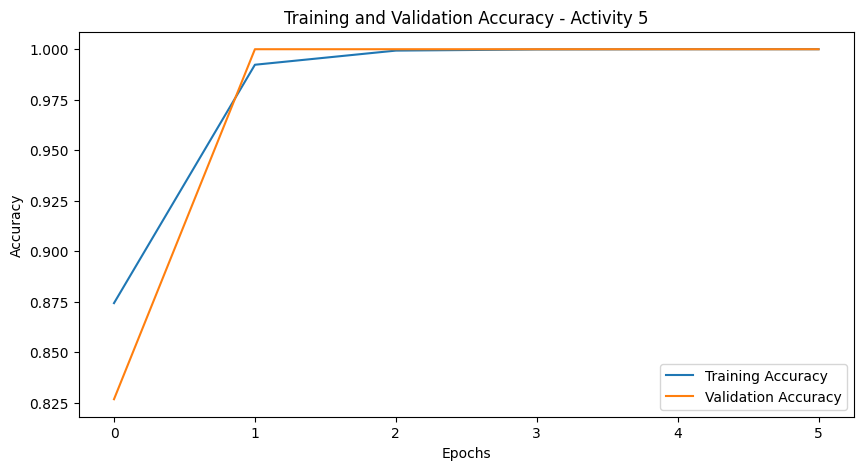

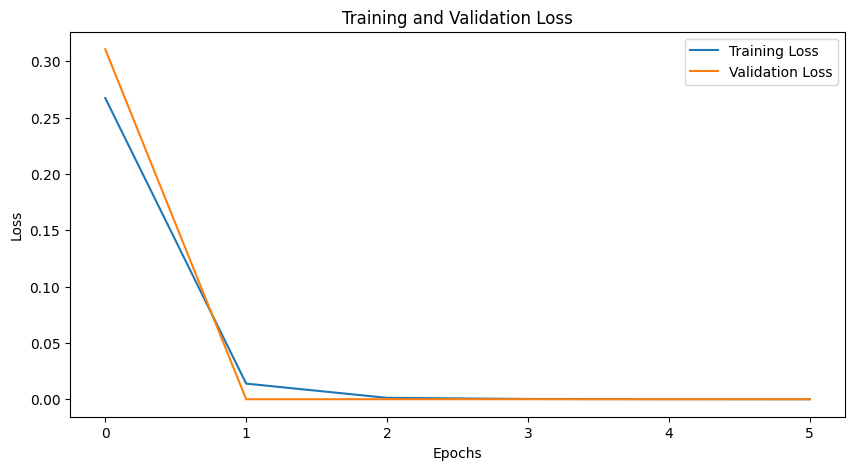

782/782 [==============================] - 2s 3ms/step - loss: 4.7691e-07 - accuracy: 1.0000
Epoch 1/6
4854/4854 [==============================] - 28s 5ms/step - loss: 0.2731 - accuracy: 0.9126 - val_loss: 0.2652 - val_accuracy: 0.8520
Epoch 2/6
4854/4854 [==============================] - 25s 5ms/step - loss: 0.0241 - accuracy: 0.9878 - val_loss: 0.0318 - val_accuracy: 0.9823
Epoch 3/6
4854/4854 [==============================] - 26s 5ms/step - loss: 0.0094 - accuracy: 0.9949 - val_loss: 5.4887e-07 - val_accuracy: 1.0000
Epoch 4/6
4854/4854 [==============================] - 27s 5ms/step - loss: 6.8911e-04 - accuracy: 0.9997 - val_loss: 5.5238e-07 - val_accuracy: 1.0000
Epoch 5/6
4854/4854 [==============================] - 24s 5ms/step - loss: 0.0076 - accuracy: 0.9960 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 6/6
4854/4854 [==============================] - 24s 5ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 4.8753e-07 - val_accuracy: 1.0000


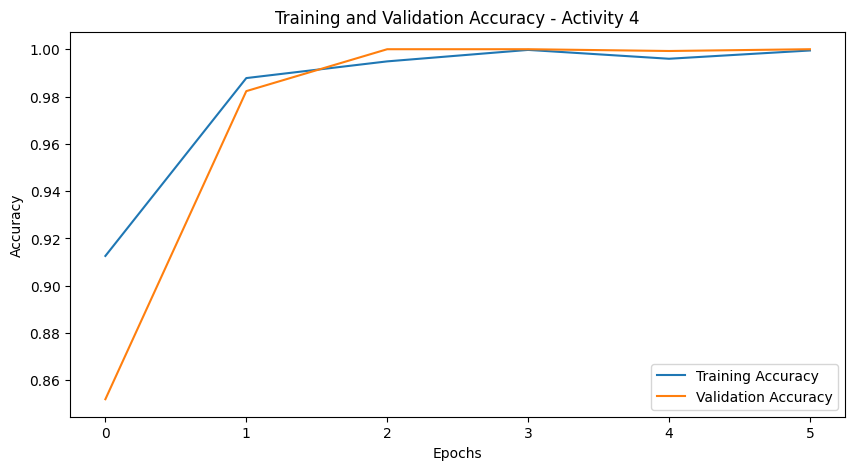

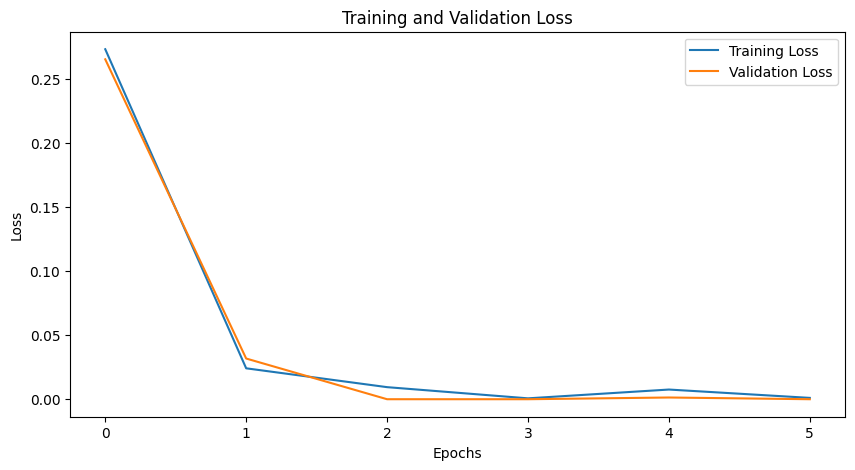

627/627 [==============================] - 2s 3ms/step - loss: 4.8753e-07 - accuracy: 1.0000
Epoch 1/6
6464/6464 [==============================] - 36s 5ms/step - loss: 0.1275 - accuracy: 0.9594 - val_loss: 0.0055 - val_accuracy: 0.9969
Epoch 2/6
6464/6464 [==============================] - 33s 5ms/step - loss: 0.0040 - accuracy: 0.9978 - val_loss: 0.0027 - val_accuracy: 0.9985
Epoch 3/6
6464/6464 [==============================] - 34s 5ms/step - loss: 8.2806e-04 - accuracy: 0.9995 - val_loss: 2.2510e-04 - val_accuracy: 0.9999
Epoch 4/6
6464/6464 [==============================] - 32s 5ms/step - loss: 1.5512e-04 - accuracy: 0.9999 - val_loss: 1.6894e-04 - val_accuracy: 0.9999
Epoch 5/6
6464/6464 [==============================] - 34s 5ms/step - loss: 2.7422e-05 - accuracy: 1.0000 - val_loss: 5.9622e-07 - val_accuracy: 1.0000
Epoch 6/6
6464/6464 [==============================] - 34s 5ms/step - loss: 5.9690e-07 - accuracy: 1.0000 - val_loss: 5.9606e-07 - val_accuracy: 1.0000


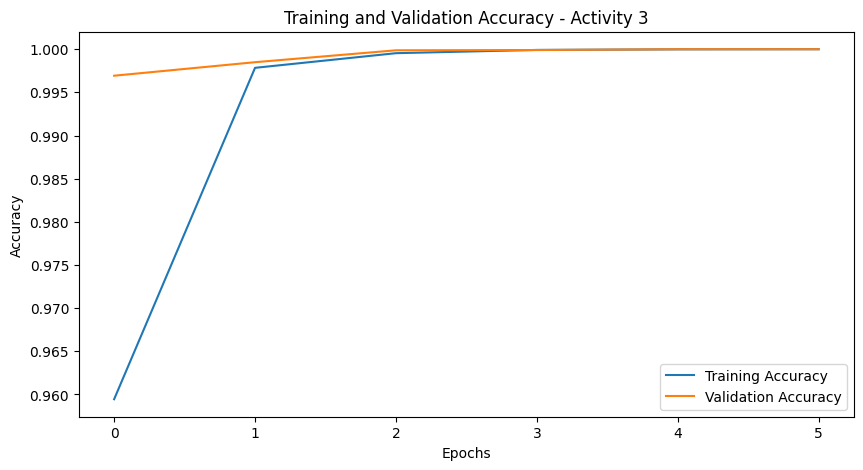

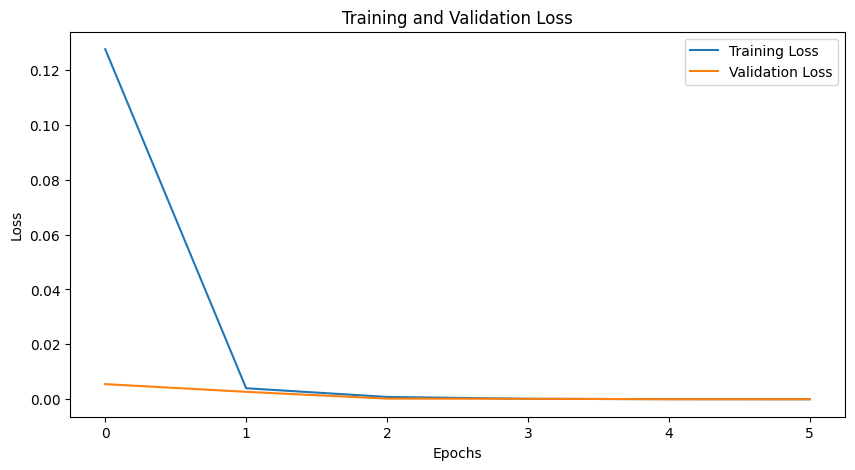

998/998 [==============================] - 2s 2ms/step - loss: 5.9606e-07 - accuracy: 1.0000
No data leakage detected.
Epoch 1/6
5216/5216 [==============================] - 27s 5ms/step - loss: 0.1992 - accuracy: 0.9873 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/6
5216/5216 [==============================] - 24s 5ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/6
5216/5216 [==============================] - 24s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/6
5216/5216 [==============================] - 24s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.9033e-04 - val_accuracy: 1.0000
Epoch 5/6
5216/5216 [==============================] - 28s 5ms/step - loss: 1.5592e-04 - accuracy: 1.0000 - val_loss: 5.9616e-07 - val_accuracy: 1.0000
Epoch 6/6
5216/5216 [==============================] - 26s 5ms/step - loss: 5.7282e-05 - accuracy: 1.0000 - val_loss: 5.9605e-07 - val_accuracy: 1.00

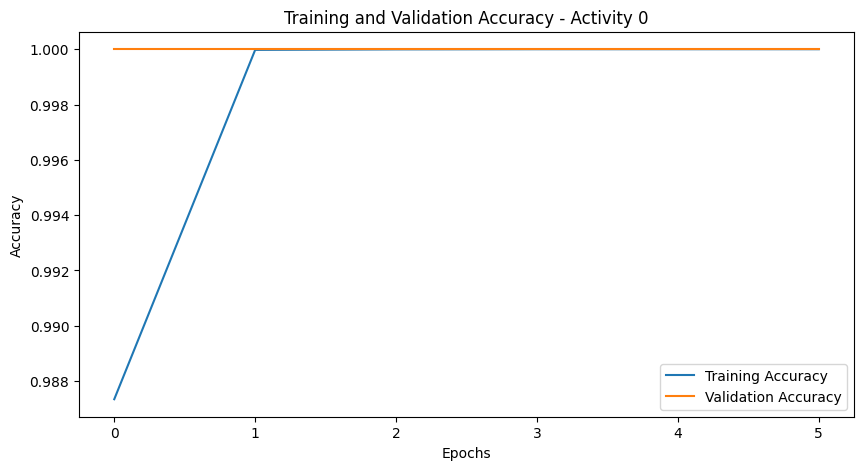

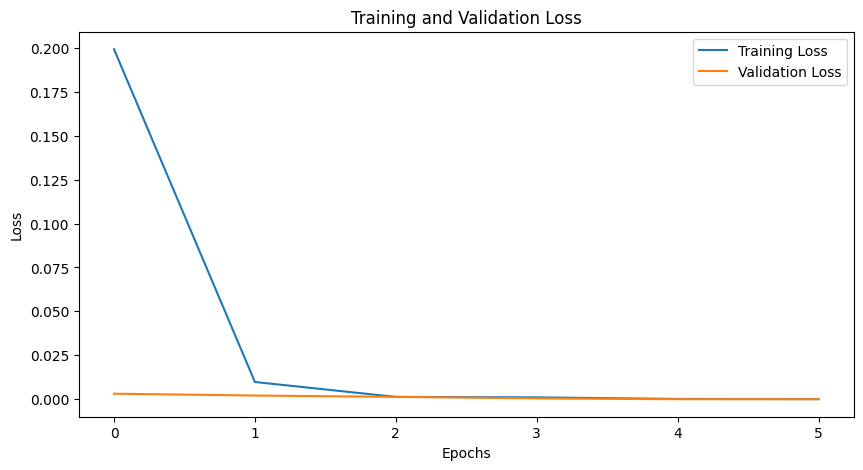

801/801 [==============================] - 2s 3ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
5404/5404 [==============================] - 30s 5ms/step - loss: 0.2483 - accuracy: 0.8935 - val_loss: 0.0477 - val_accuracy: 0.9734
Epoch 2/6
5404/5404 [==============================] - 27s 5ms/step - loss: 0.1328 - accuracy: 0.9263 - val_loss: 0.0139 - val_accuracy: 0.9923
Epoch 3/6
5404/5404 [==============================] - 27s 5ms/step - loss: 0.0243 - accuracy: 0.9864 - val_loss: 5.8415e-04 - val_accuracy: 0.9997
Epoch 4/6
5404/5404 [==============================] - 26s 5ms/step - loss: 0.0013 - accuracy: 0.9993 - val_loss: 5.9605e-07 - val_accuracy: 1.0000
Epoch 5/6
5404/5404 [==============================] - 26s 5ms/step - loss: 1.4892e-04 - accuracy: 0.9999 - val_loss: 5.9614e-07 - val_accuracy: 1.0000
Epoch 6/6
5404/5404 [==============================] - 27s 5ms/step - loss: 8.6898e-05 - accuracy: 1.0000 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


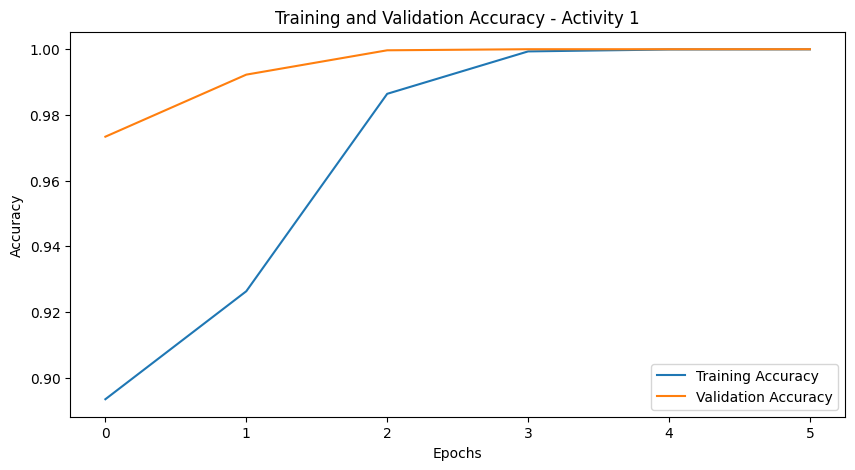

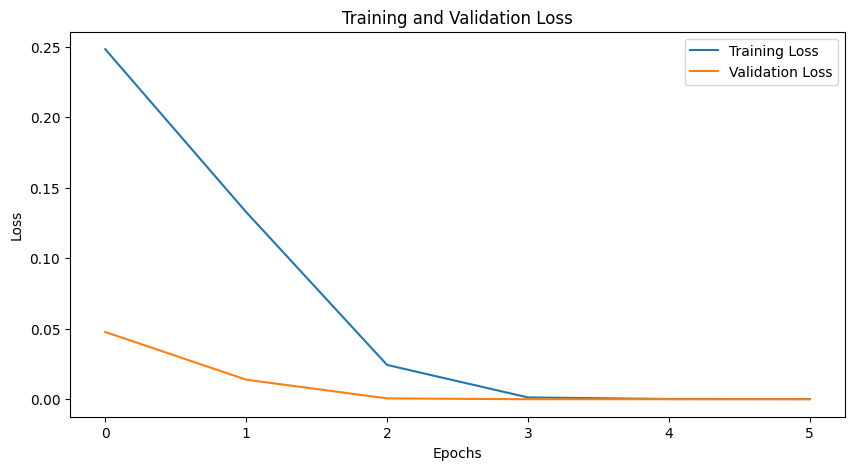

384/384 [==============================] - 1s 2ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
5131/5131 [==============================] - 29s 5ms/step - loss: 0.3358 - accuracy: 0.8466 - val_loss: 5.9049e-05 - val_accuracy: 1.0000
Epoch 2/6
5131/5131 [==============================] - 29s 6ms/step - loss: 0.0375 - accuracy: 0.9802 - val_loss: 1.9610e-05 - val_accuracy: 1.0000
Epoch 3/6
5131/5131 [==============================] - 27s 5ms/step - loss: 0.0043 - accuracy: 0.9977 - val_loss: 1.0761e-05 - val_accuracy: 1.0000
Epoch 4/6
5131/5131 [==============================] - 28s 5ms/step - loss: 0.0027 - accuracy: 0.9985 - val_loss: 1.0115e-05 - val_accuracy: 1.0000
Epoch 5/6
5131/5131 [==============================] - 27s 5ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 5.9623e-07 - val_accuracy: 1.0000
Epoch 6/6
5131/5131 [==============================] - 27s 5ms/step - loss: 3.6074e-04 - accuracy: 0.9998 - val_loss: 5.9605e-07 - val_accuracy: 1.0000


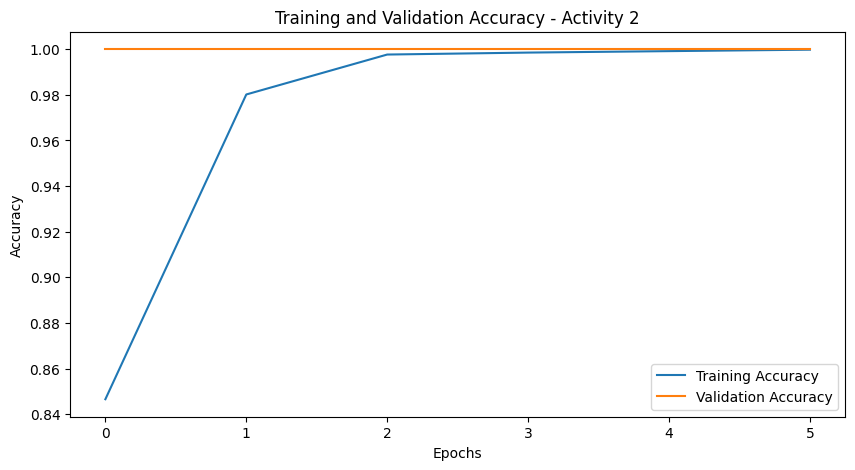

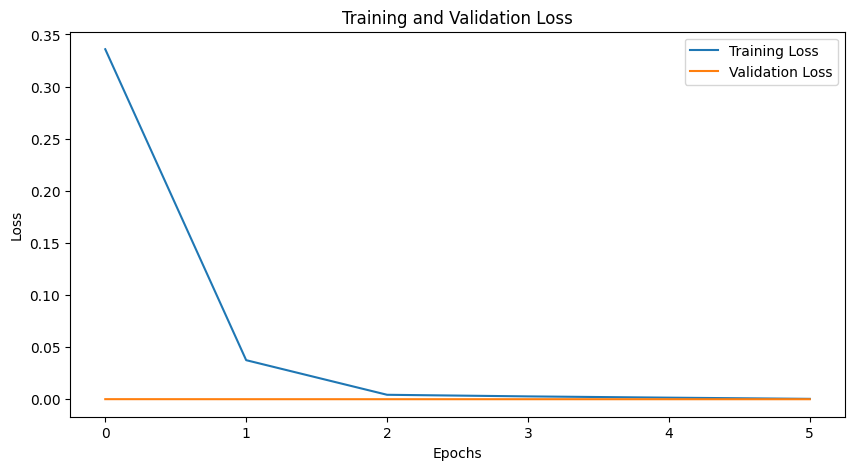

805/805 [==============================] - 2s 3ms/step - loss: 5.9605e-07 - accuracy: 1.0000
Epoch 1/6
6538/6538 [==============================] - 37s 5ms/step - loss: 0.1389 - accuracy: 0.9567 - val_loss: 7.2938e-04 - val_accuracy: 0.9996
Epoch 2/6
6538/6538 [==============================] - 34s 5ms/step - loss: 0.0130 - accuracy: 0.9929 - val_loss: 4.7771e-07 - val_accuracy: 1.0000
Epoch 3/6
6538/6538 [==============================] - 34s 5ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 6.1220e-05 - val_accuracy: 1.0000
Epoch 4/6
6538/6538 [==============================] - 34s 5ms/step - loss: 3.5593e-04 - accuracy: 0.9998 - val_loss: 4.7716e-07 - val_accuracy: 1.0000
Epoch 5/6
6538/6538 [==============================] - 33s 5ms/step - loss: 1.8607e-04 - accuracy: 0.9999 - val_loss: 4.7684e-07 - val_accuracy: 1.0000
Epoch 6/6
6538/6538 [==============================] - 42s 6ms/step - loss: 1.7806e-06 - accuracy: 1.0000 - val_loss: 4.7685e-07 - val_accuracy: 1.0000


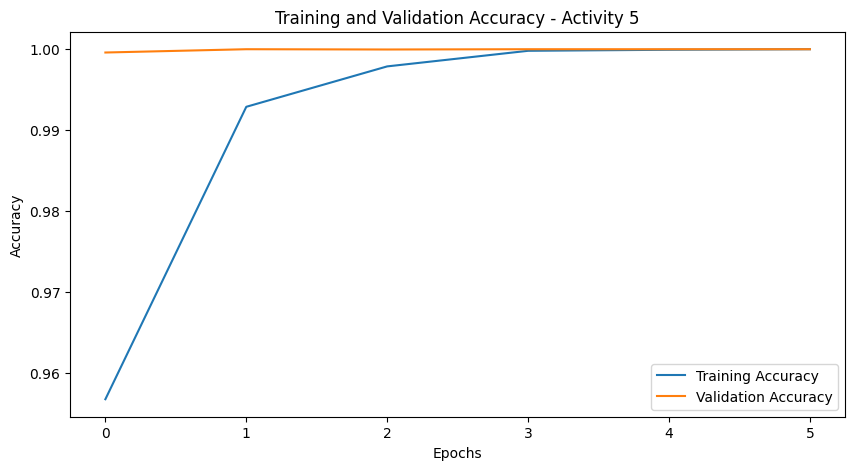

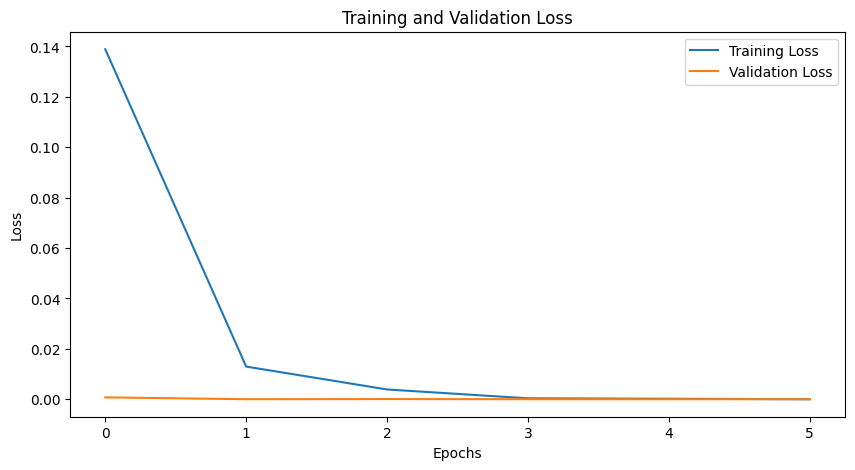

922/922 [==============================] - 3s 3ms/step - loss: 4.7685e-07 - accuracy: 1.0000
Epoch 1/6
4807/4807 [==============================] - 32s 6ms/step - loss: 0.1178 - accuracy: 0.9771 - val_loss: 7.4883e-04 - val_accuracy: 0.9996
Epoch 2/6
4807/4807 [==============================] - 30s 6ms/step - loss: 0.0032 - accuracy: 0.9983 - val_loss: 1.6682e-04 - val_accuracy: 0.9999
Epoch 3/6
4807/4807 [==============================] - 29s 6ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 4.9538e-07 - val_accuracy: 1.0000
Epoch 4/6
4807/4807 [==============================] - 30s 6ms/step - loss: 2.6072e-04 - accuracy: 0.9999 - val_loss: 4.7688e-07 - val_accuracy: 1.0000
Epoch 5/6
4807/4807 [==============================] - 31s 6ms/step - loss: 7.3765e-05 - accuracy: 1.0000 - val_loss: 4.7684e-07 - val_accuracy: 1.0000
Epoch 6/6
4807/4807 [==============================] - 31s 6ms/step - loss: 2.5234e-05 - accuracy: 1.0000 - val_loss: 4.7684e-07 - val_accuracy: 1.0000


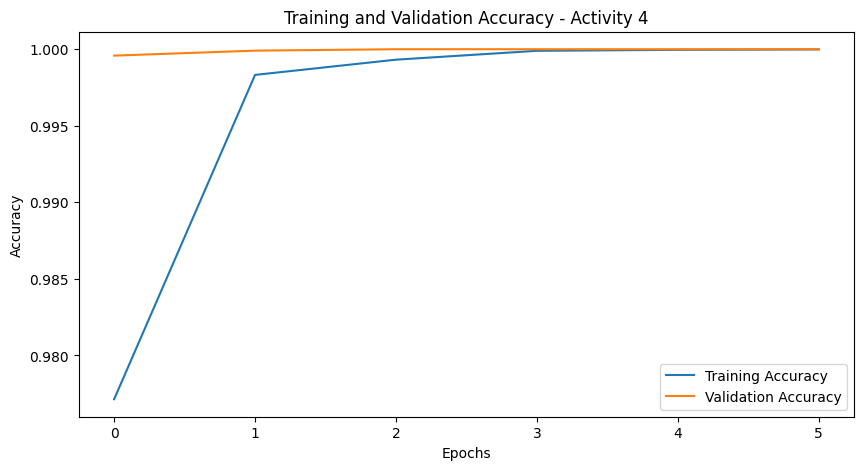

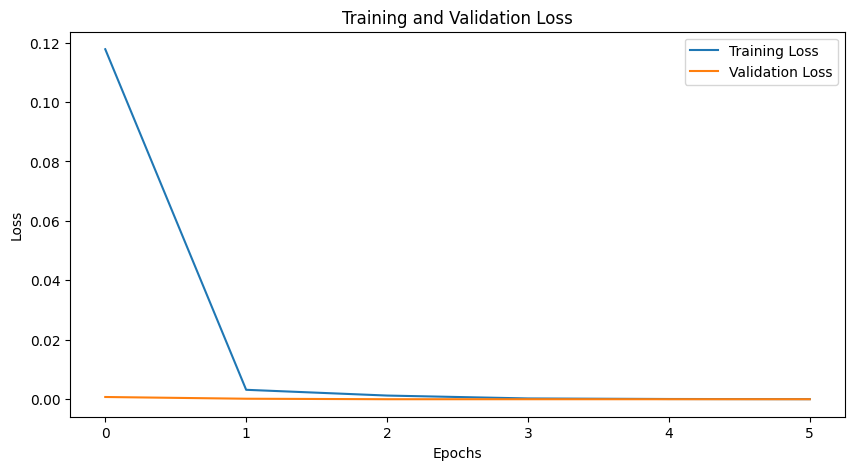

674/674 [==============================] - 3s 4ms/step - loss: 4.7684e-07 - accuracy: 1.0000
Epoch 1/6
6408/6408 [==============================] - 44s 6ms/step - loss: 0.1553 - accuracy: 0.9484 - val_loss: 1.1876e-04 - val_accuracy: 0.9999
Epoch 2/6
6408/6408 [==============================] - 43s 7ms/step - loss: 0.0058 - accuracy: 0.9968 - val_loss: 6.2231e-07 - val_accuracy: 1.0000
Epoch 3/6
6408/6408 [==============================] - 51s 8ms/step - loss: 0.0020 - accuracy: 0.9989 - val_loss: 5.3739e-05 - val_accuracy: 1.0000
Epoch 4/6
6408/6408 [==============================] - 55s 9ms/step - loss: 2.0520e-04 - accuracy: 0.9999 - val_loss: 0.0638 - val_accuracy: 0.9762
Epoch 5/6
6408/6408 [==============================] - 48s 7ms/step - loss: 1.4075e-04 - accuracy: 0.9999 - val_loss: 6.1591e-07 - val_accuracy: 1.0000
Epoch 6/6
4818/6408 [=====================>........] - ETA: 9s - loss: 3.3064e-04 - accuracy: 0.9998

In [ ]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

np.random.seed(42)
tf.random.set_seed(24)

activities = data['activityID'].unique()
subjects = data['subject_id'].unique()

scaler = StandardScaler()

num_classes = len(data['activityID'].unique())

for train_index, test_index in kf.split(subjects):
    train_subjects = subjects[train_index]
    test_subjects = subjects[test_index]

    train_data = data[data['subject_id'].isin(train_subjects)]
    test_data = data[data['subject_id'].isin(test_subjects)]

    train_data_ids = set(train_data['subject_id'])
    test_data_ids = set(test_data['subject_id'])

    intersection = train_data_ids.intersection(test_data_ids)
    if intersection:
        print(f"Intersection between train and test data: {intersection}")
    else:
        print("No data leakage detected.")

    for activity in activities:
        train_activity_data = train_data[train_data['activityID'] == activity]
        test_activity_data = test_data[test_data['activityID'] == activity]

        X_train = train_activity_data[feature_columns].values
        y_train = train_activity_data[label_column].values
        X_test = test_activity_data[feature_columns].values
        y_test = test_activity_data[label_column].values

        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
        X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

        model = Sequential()

        #model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
        model.add(GRU(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(units=num_classes, activation='relu'))

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train_scaled, y_train, epochs=6, batch_size=32, validation_data=(X_test_scaled, y_test))

        results[f"Activity_{activity}"] = {'Loss': loss, 'Accuracy': accuracy}

        #loss, accuracy = model.evaluate(X_test_scaled, y_test)

        #for idx in range(len(X_test)):
          #sample = X_test_scaled[idx].reshape(1, X_test_scaled.shape[1], X_test_scaled.shape[2])
          #true_label = y_test[idx]
          #predicted_probs = model.predict(sample)[0]
          #predicted_label = np.argmax(predicted_probs)

          #if true_label != predicted_label:
             # print(f"Sample {idx}: True Activity: {true_label}, Predicted Activity: {predicted_label}")
          #else:
          #    print(f"Sample {idx} Predicted RIGHT!")

        plt.figure(figsize=(10, 5))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy - Activity {activity}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        loss, accuracy = model.evaluate(X_test_scaled, y_test)

        results[f"Activity_{activity}"] = {'Loss': loss, 'Accuracy': accuracy}


In [8]:
results_df = pd.DataFrame(results).T

results_df.to_csv('/content/drive/MyDrive/ColabData/results.csv')